## World Health Organization (WHO) Life Expectancy Regression

## Plan

The goal of the project is to examine data from WHO and determine which factors are the main contributors to the variations in life expectancy across different countries around the globe, provide valuable insights, and support global health and development initiatives.

Unlike previous studies that left out some relevant healthcare related information, this dataset takes into consideration important features such as immunization across the countries and years, mortality factors, economic factors, social factors and other health related factors as well.

Since we are trying to predict a continuous variable (life expentancy) based on all the features provided from the dataset, and find out which ones are the most relevant for this analysis, this is a textbook regression problem, where the outcome is a value inferenced based on historical data.

For this type of problems there are several algorithms that could be a good fit for us to tackle our main questions, we will try using Linear Regresion, Decision Trees, Random Forest, XGBoost and compare them to see which have the best performance.

### Key questions

The data-set aims to answer the following key questions:

* Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
* Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
* How does Infant and Adult mortality rates affect life expectancy?
* Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
* What is the impact of schooling on the lifespan of humans?
* Does Life Expectancy have positive or negative relationship with drinking alcohol?
* Do densely populated countries tend to have lower life expectancy?
* What is the impact of Immunization coverage on life Expectancy?

### Import Packages and Libraries

In [ ]:
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Data Vizualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer

# Modeling libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error ,mean_squared_error, r2_score


# Import warning ignores
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset from Kaggle

In [ ]:
# Loading kaggle API Keys
from google.colab import files
files.upload()

# Installing Kaggle library
!pip install kaggle

# Creating Directory for Datasets
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

# Download Kaggle dataset
!kaggle datasets download -d kumarajarshi/life-expectancy-who

# Unzip dataset to csv
!unzip life-expectancy-who.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
License(s): other
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 46.6MB/s]
Archive:  life-expectancy-who.zip
  inflating: Life Expectancy Data.csv  


In [ ]:
# Read csv with pandas
df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
# Review first few rows
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [ ]:
# Review shape
df.shape

(2938, 22)

The dataset has 2938 rows and 22 features.




---


## Analyze
On this stage we will review the dataset to understand what we are working with, making sure we clean and prepare our data for further analysis and modeling in futher steps.

### Exploratory Data Analysis

#### Data Overview

In [ ]:
# Review columns and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

The dataset seems to have a total of **22 columns** with several containing `null` values across the dataset, its mainly compose of numerical features with only 2 categorical variables: `Country` and `Status`.


#### Data General Statistic

In [ ]:
# Review dataset basic stats
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

A first glance at the data seems to indicate that:

*   This dataset covers records from **2000 to 2015**.
*   Several columns seems to be **extremely positively skewed** suggesting presence of **outliers**.
*   There are several columns with **null values**.
*   The columns **naming pattern** isn't normalized.
*   `Country` and `Status` are the only **categorical** features.
*   `BMI`, an index usually used for measuring obesity (where 18.5 to 24.9 is considered normal) seems to be extremely skewed to the right, with a median of 43, suggesting that almost half of the entire population in the dataset are overweight.



#### Standardize naming pattern

In [ ]:
# Listing all columns
print(df.columns)

# Normalizing column names
df.columns = df.columns.str.lower().str.replace(' ', '')
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Index(['country', 'year', 'status', 'lifeexpectancy', 'adultmortality',
       'infantdeaths', 'alcohol', 'percentageexpenditure', 'hepatitisb',
       'measles', 'bmi', 'under-fivedeaths', 'polio', 'totalexpenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness1-19years',
       'thinness5-9years', 'incomecompositionofresources', 'schooling'],
      dtype='object')


#### Check null and missing values

In [ ]:
# Listing columns with nulls and the percentage of missing values per features
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False) / df.shape[0] * 100

population                      22.191967
hepatitisb                      18.822328
gdp                             15.248468
totalexpenditure                 7.692308
alcohol                          6.603131
incomecompositionofresources     5.684139
schooling                        5.547992
bmi                              1.157250
thinness1-19years                1.157250
thinness5-9years                 1.157250
polio                            0.646698
diphtheria                       0.646698
lifeexpectancy                   0.340368
adultmortality                   0.340368
dtype: float64

There are **14 features** with null/missing values. `population` seems to be the feature with the most missing value **22.19%**, followed by `hepatitisb` with **18.82%** and `gdp` with **15.24%**.

#### Check duplicated values

In [ ]:
# Check duplicated
df.duplicated().sum()

0

There are no duplicated records within the dataset.

#### Check outliers

In [ ]:
# List Outliers by columns
num_cols = df.select_dtypes(include=np.number).columns.to_list()

# Review all numeric features for outliers
for col in num_cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  if not outliers.empty:
    print(f"Outliers in {col}: {outliers.shape[0]}")

Outliers in lifeexpectancy: 10
Outliers in adultmortality: 82
Outliers in infantdeaths: 315
Outliers in percentageexpenditure: 389
Outliers in hepatitisb: 254
Outliers in measles: 542
Outliers in under-fivedeaths: 394
Outliers in polio: 279
Outliers in totalexpenditure: 32
Outliers in diphtheria: 298
Outliers in hiv/aids: 542
Outliers in gdp: 365
Outliers in population: 294
Outliers in thinness1-19years: 89
Outliers in thinness5-9years: 96
Outliers in incomecompositionofresources: 130
Outliers in schooling: 44


#### Check features/target correlation

In [ ]:
# Life Expentancy correlation with other features
num_cols = df.select_dtypes(include=np.number).columns.to_list()
df[num_cols].corr()["lifeexpectancy"].sort_values(ascending=False)

lifeexpectancy                  1.000000
schooling                       0.751975
incomecompositionofresources    0.724776
bmi                             0.567694
diphtheria                      0.479495
polio                           0.465556
gdp                             0.461455
alcohol                         0.404877
percentageexpenditure           0.381864
hepatitisb                      0.256762
totalexpenditure                0.218086
year                            0.170033
population                     -0.021538
measles                        -0.157586
infantdeaths                   -0.196557
under-fivedeaths               -0.222529
thinness5-9years               -0.471584
thinness1-19years              -0.477183
hiv/aids                       -0.556556
adultmortality                 -0.696359
Name: lifeexpectancy, dtype: float64

### Visualization

#### Life expectancy throughout the years

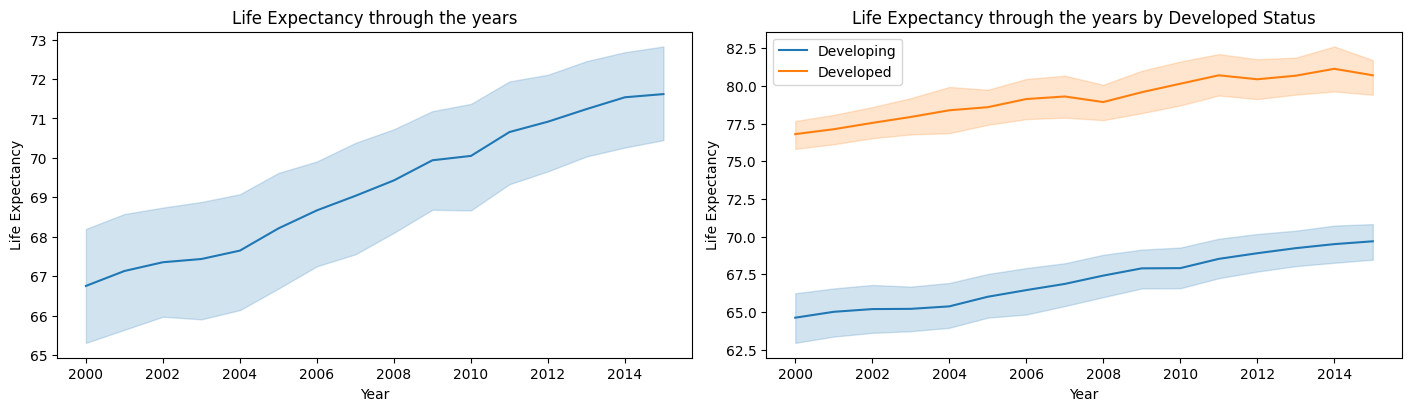

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(14,4),ncols=2,nrows=1,constrained_layout=True)

## Life Expectancy throught the years
sns.lineplot(data=df, x="year", y="lifeexpectancy", ax=axes[0])
axes[0].set_title("Life Expectancy through the years")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Life Expectancy")

## Grouped by Developed Status
sns.lineplot(data=df, x="year", y="lifeexpectancy", hue="status", ax=axes[1])
axes[1].set_title("Life Expectancy through the years by Developed Status")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Life Expectancy")
axes[1].legend()

plt.show()

There is a steady increase in life expectancy across the world, for both developing countries and developed countries as the time passes, probably due to advancement in medical technology, vaccines and healthcare systems.

In [ ]:
# Average Mean Life Expectancy by Status
df.groupby("status")["lifeexpectancy"].mean()

status
Developed     79.197852
Developing    67.111465
Name: lifeexpectancy, dtype: float64

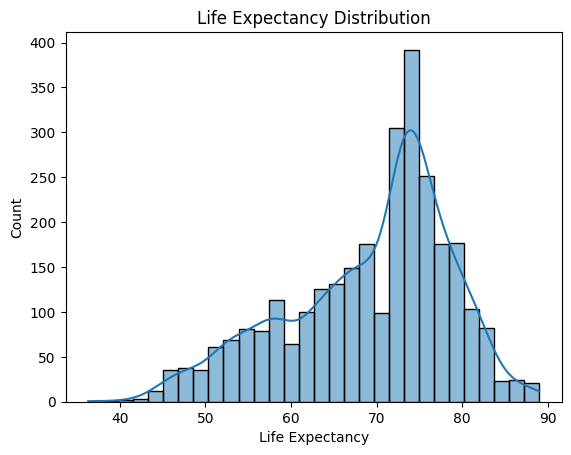

In [ ]:
# Life Expectancy Distribution
sns.histplot(data=df, x="lifeexpectancy", kde=True)
plt.title("Life Expectancy Distribution")
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.show()

#### Healthcare expenditure vs life expectancy
Review on the percentage of total goverment expenditure that is used on healthcare vs the country life expectancy.

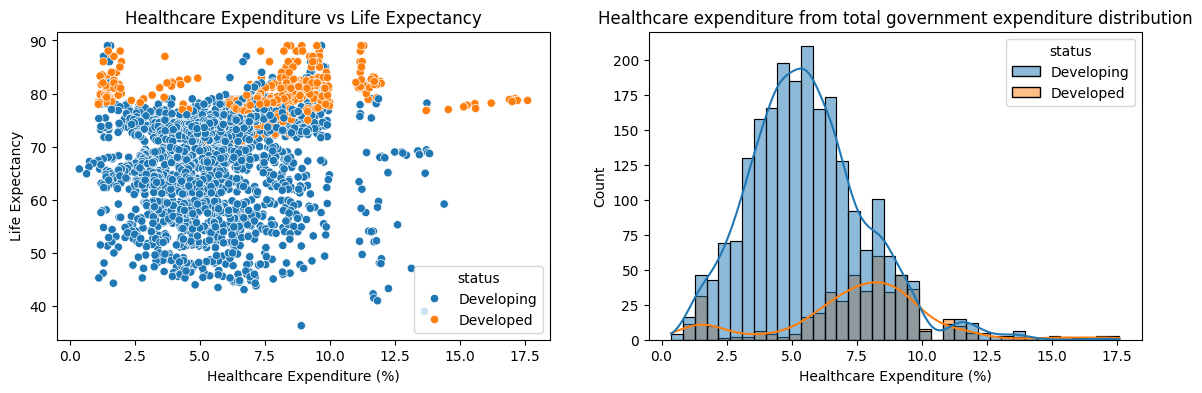

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(14,4),ncols=2,nrows=1)

# Expenditure vs life expectancy
sns.scatterplot(data=df, x="totalexpenditure", y="lifeexpectancy",hue="status",ax=axes[0])
axes[0].set_title("Healthcare Expenditure vs Life Expectancy")
axes[0].set_xlabel("Healthcare Expenditure (%)")
axes[0].set_ylabel("Life Expectancy")

# Expenditure distribution
sns.histplot(data=df, x="totalexpenditure", hue="status", kde=True,ax=axes[1])
axes[1].set_title("Healthcare expenditure from total government expenditure distribution")
axes[1].set_xlabel("Healthcare Expenditure (%)")
axes[1].set_ylabel("Count")

plt.show()

*  **Life expectancy** between countries that spend **similar amount** from their government budget to their healthcare system **varies quite a lot**, seemingly indicating that the correlation between the amount spent on healthcare does not necessarily mean a significant increase in life expectancy across the world.
*  Additionally you can also identify a separation around the 10.5% mark between 2 groups, the more usual trend are on the left, and the right seems to a few that spent a lot of their budget on health.
*  We can also see that for developing countries the median expenditure on health is around **5%-6%** but for developed countries the median is around **8%-9%**. Developed countries probably can afford to spend more on health as they have a higher budget.
* Needless to say that we have a lot of countries spending similar amount (%) on healthcare but have way lower life expectancy than their counterpart.

#### Percentage of GDP per capita spent on healthcare vs life expectancy

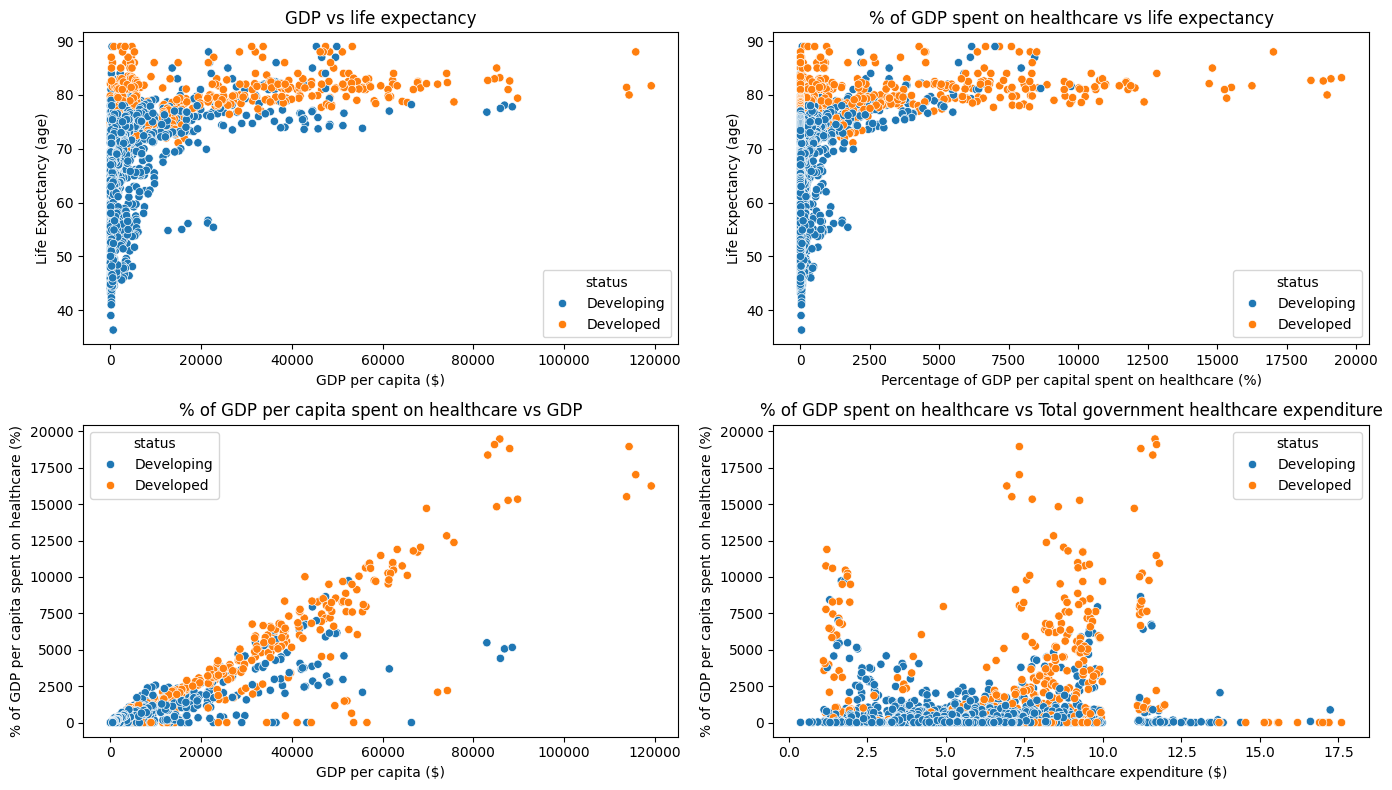

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(14,8),ncols=2,nrows=2)

# GDP per capita vs life expectancy
sns.scatterplot(data=df, x="gdp", y="lifeexpectancy",hue="status",ax=axes[0,0])
axes[0,0].set_title("GDP vs life expectancy")
axes[0,0].set_xlabel("GDP per capita ($)")
axes[0,0].set_ylabel("Life Expectancy (age)")

# Percentage of GDP per capita spent on health vs life expectancy
sns.scatterplot(data=df, x="percentageexpenditure", y="lifeexpectancy",hue="status",ax=axes[0,1])
axes[0,1].set_title("% of GDP spent on healthcare vs life expectancy")
axes[0,1].set_xlabel("Percentage of GDP per capital spent on healthcare (%)")
axes[0,1].set_ylabel("Life Expectancy (age)")

# Percentage of GDP per capita spent on health vs GDP per capita
sns.scatterplot(data=df, y="percentageexpenditure", x="gdp",hue="status",ax=axes[1,0])
axes[1,0].set_title("% of GDP per capita spent on healthcare vs GDP")
axes[1,0].set_ylabel("% of GDP per capita spent on healthcare (%)")
axes[1,0].set_xlabel("GDP per capita ($)")

# Percentage of GDP per capita spent on health vs health expenditure percentage
sns.scatterplot(data=df, y="percentageexpenditure", x="totalexpenditure",hue="status",ax=axes[1,1])
axes[1,1].set_title("% of GDP spent on healthcare vs Total government healthcare expenditure")
axes[1,1].set_ylabel("% of GDP per capita spent on healthcare (%)")
axes[1,1].set_xlabel("Total government healthcare expenditure ($)")

plt.tight_layout()
plt.show()

* It seems that there is somewhat a correlation with `GDP per capital` and `life expectancy`, not necessarily linear, but **in general higher GPD tend to indicate higher life expectancy**, but the plot show that there are scenario where low GPD can also have high life expectancy.
* Similarly, the expenditure on healthcare as a % of GDP per capita follow a very similar trend to our previous plot.
* There seems to be a positive correlation between `percentage expenditure` and `gdp` suggesting multicollinearity with `life expectancy`, this seem rather logical as countries that have higher `gdp` per capital can afford to spend more on healthcare.
* `total expenditure` and `percentage expenditure` despite sounding similar, both seems to be independent from each other, as the first is a % based on the total budget and the latter is a % based on the `gdp` per capital.

#### Schooling and income composition of resources vs life expectancy

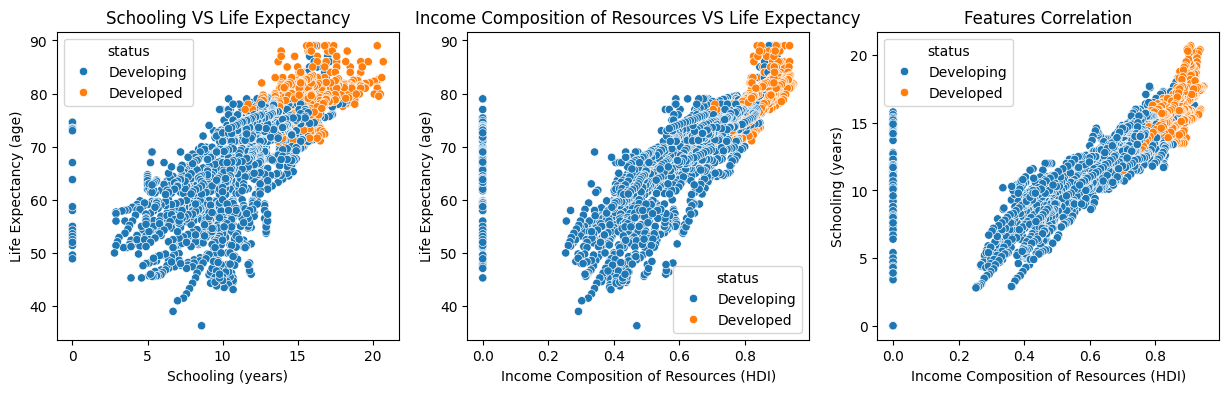

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(15,4),ncols=3,nrows=1)

# schooling vs life expectancy
sns.scatterplot(data=df, x="schooling", y="lifeexpectancy",hue="status",ax=axes[0])
axes[0].set_title("Schooling VS Life Expectancy")
axes[0].set_xlabel("Schooling (years)")
axes[0].set_ylabel("Life Expectancy (age)")

# Income composition of resources vs life expectancy
sns.scatterplot(data=df, x="incomecompositionofresources", y="lifeexpectancy",hue="status",ax=axes[1])
axes[1].set_title("Income Composition of Resources VS Life Expectancy")
axes[1].set_xlabel("Income Composition of Resources (HDI)")
axes[1].set_ylabel("Life Expectancy (age)")

# Income composition of resources vs schooling
sns.scatterplot(data=df, x="incomecompositionofresources", y="schooling",hue="status",ax=axes[2])
axes[2].set_title("Features Correlation")
axes[2].set_xlabel("Income Composition of Resources (HDI)")
axes[2].set_ylabel("Schooling (years)")

plt.show()

* `Schooling` (the number of years it takes to complete school) seems to have a quite a linear correlation with `life expectancy`, the median for `schooling` is 12 years, and based on the plot it seems to indicate that the longer a country make their students stay in school the higher the life expectancy.
* `Income Composition of Resources` taken from the **(Human Development Index)** also seems to have a very strong correlation with `life expectancy`, meaning the more income per capita a country have the higher their life expectancy.
* Both features seems to have several outliers on the left side.
* As both `schooling` and `income composition of resource` are apparently co-related, suggesting that coutries with higher income per capita tend to have longer schooling years, and as both features increases so do `life expectancy`.
* It is suggested to take 1 one the feature out of the model to avoid multicollinearity.


#### How does infant and adult deaths affect life expectancy

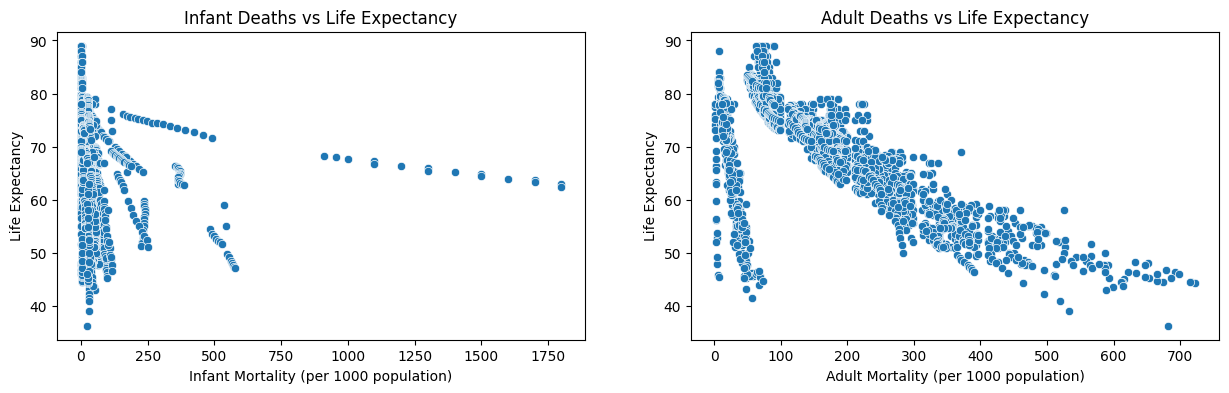

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(15,4),ncols=2,nrows=1)

# Infant death vs life expectancy
sns.scatterplot(data=df, x="infantdeaths", y="lifeexpectancy",ax=axes[0])
axes[0].set_title("Infant Deaths vs Life Expectancy")
axes[0].set_xlabel("Infant Mortality (per 1000 population)")
axes[0].set_ylabel("Life Expectancy")

# Adult mortality vs life expectancy
sns.scatterplot(data=df, x="adultmortality", y="lifeexpectancy",ax=axes[1])
axes[1].set_title("Adult Deaths vs Life Expectancy")
axes[1].set_xlabel("Adult Mortality (per 1000 population)")
axes[1].set_ylabel("Life Expectancy")

plt.show()

*   There are some clear outliers on the infant mortality leaning extremely to the right side, suggesting extremely high infant mortality.
*   On the adult graph we see `2 clusters`, on the right we see a logical trend where **the higher the mortality the lower the life expectancy**. On the left we see a group of relatively **low mortality rate but a large variance of life expectancy**.
*   The generally trend seems to indicate that **the lower the mortality the higher the life expectancy**, which by definition is pretty logical.
*   These outliers should be treated before training the model.



#### Alcohol effect on life expectancy

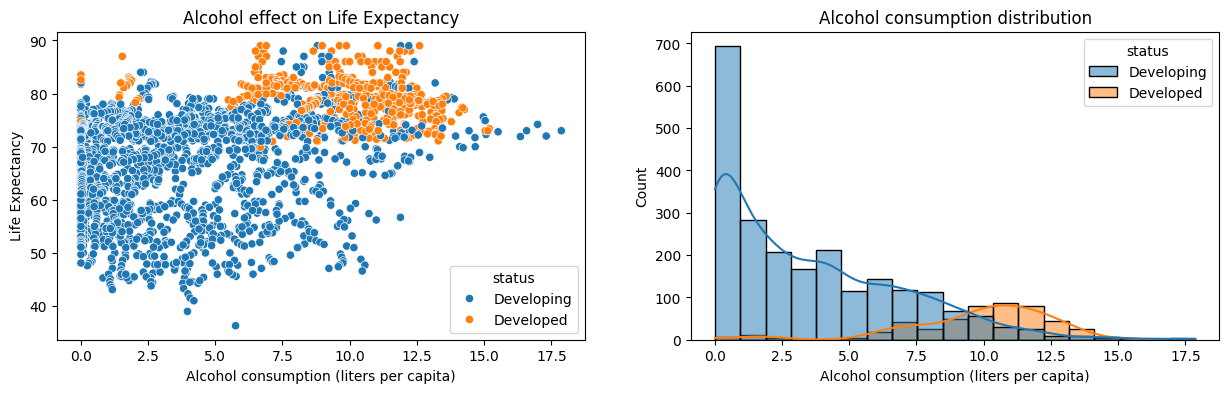

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(15,4),ncols=2,nrows=1)

# alcohol vs life expectancy
sns.scatterplot(data=df, x="alcohol", y="lifeexpectancy",hue="status",ax=axes[0])
axes[0].set_title("Alcohol effect on Life Expectancy")
axes[0].set_xlabel("Alcohol consumption (liters per capita)")
axes[0].set_ylabel("Life Expectancy")

# alcohol consumption distribution by status
sns.histplot(data=df, x="alcohol", hue="status",kde=True,ax=axes[1])
axes[1].set_title("Alcohol consumption distribution")
axes[1].set_xlabel("Alcohol consumption (liters per capita)")
axes[1].set_ylabel("Count")

plt.show()

* The plot suggest that `alcohol` consumption does not seem to have as big as a negative effect on `life expectancy` as one would expect, on the contrary it seems to suggest that countries with **higher consumption tend to have a moderately higher life expectancy**.
* The developed countries seems to consume moderately higher volume of alcohol than their counterpart, but they have maintain a rather high life expectancy.
* This could possibly contribute to the lessen effect of alcohol on life expectancy since developed countries probably have other aspects that add value to their higher life expectancy.
* Looking at the distribuition graph, on average **developed countries seems to consume more alcohol**.

#### Population relation with life expectancy

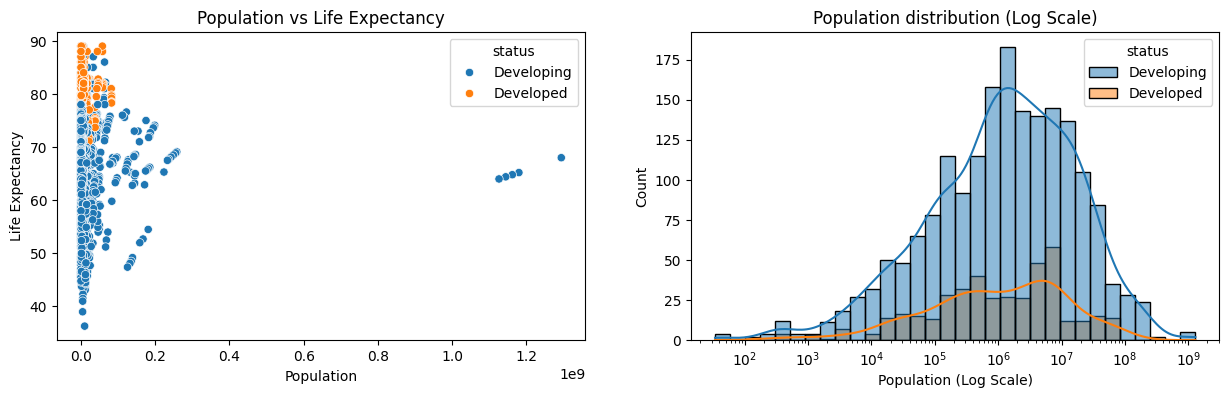

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(15,4),ncols=2,nrows=1)

# Population vs life expectancy
sns.scatterplot(data=df, x="population", y="lifeexpectancy",hue="status",ax=axes[0])
axes[0].set_title("Population vs Life Expectancy")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Life Expectancy")

# Population distribution (log scale)
sns.histplot(data=df, x="population",hue="status",log_scale=True,kde=True,ax=axes[1])
axes[1].set_title("Population distribution (Log Scale)")
axes[1].set_xlabel("Population (Log Scale)")
axes[1].set_ylabel("Count")

plt.show()

* Logically, `population` have extreme outliers due to a few countries with large amount of population, this won't allow us to see its relation with `life expectancy`, we should deal with the outliers and check the relation again.
* Similarly, population distribution is often highly skewed to the right, due to the same reason as mentioned previously. To allow an easier visualization of the distribution we can use a log scale on the x-axis.
* The median population (log scale) for developed and developing countries are pretty similar.

#### General outliers review

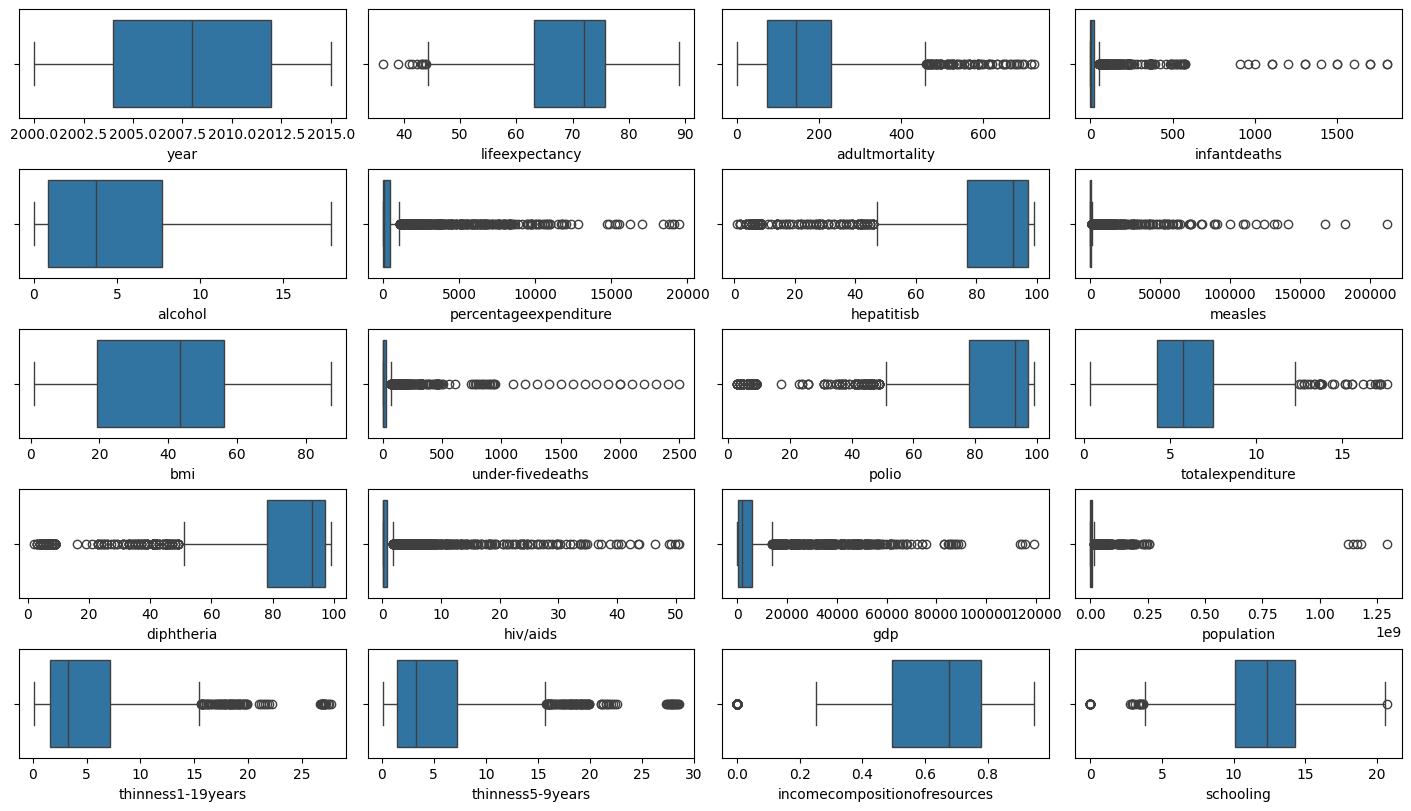

In [ ]:
# Review outliers

# General purpose function to plot dataset outliers
def plot_outliers(df,columns):
  fig, axes = plt.subplots(figsize=(14,8),ncols=4,nrows=5,constrained_layout=True)

  for i in range(len(columns)):
    sns.boxplot(data=df[columns[i]],orient="h",ax=axes[i//4,i%4])
  plt.show()

# Graph all features with possible outliers
num_cols = df.select_dtypes(include=np.number).columns.to_list()

# Show graph
plot_outliers(df,num_cols)

Its clear that several featureshave certain level of outliers that we will have to work on, before we proceed with training.

#### Feature correlation matrix (base)

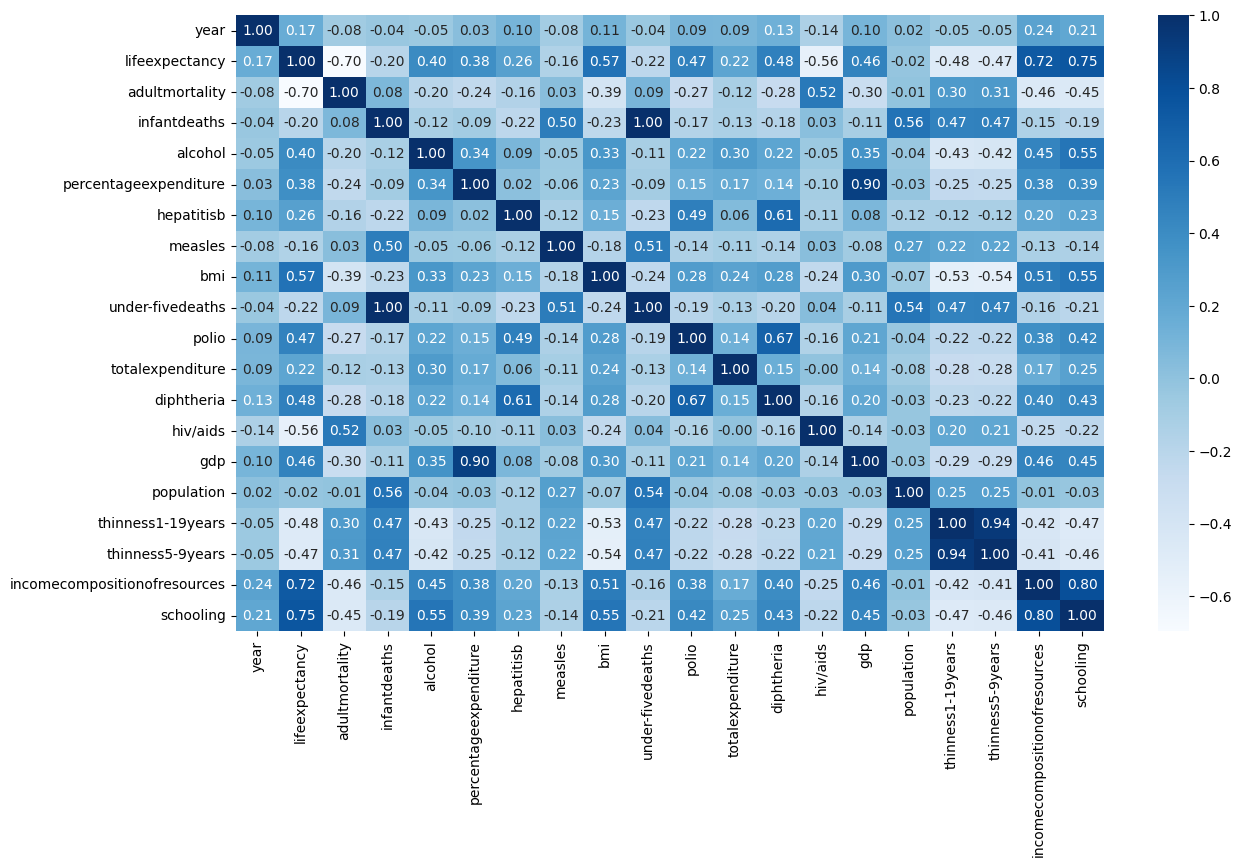

In [ ]:
# Show correlation matrix
corr = df[num_cols].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap="Blues", fmt='.2f')
plt.show()

From the plot above we can get the following insights:
* A correlation index of **0.17** between `years` and `life expectancy` seems to indicate that from 2000 to 2015 there was a slighly increase in life expectancy globally (within the countries in the dataset).
*   The most relevant features when it comes to `life expectancy` apparently is `schooling` with **0.72** and `income composition of resources` with **0.75**.
*  Both `schooling` and `income composition of resources` are highly correlated, sugesting multi-collinearity with `life expectancy`.
*  `gdp` per capita is possitively correlated (0.90) with the `percentage of expenditure` in healthcare.
*  `Measles` and `HIV/AIDS` are negatively correlated to `life expectancy`, unlike the other sickness related features, this is because ther first group measure the reported cases, and the latter measure vaccination coverage.
*   `Thinness 1-19` and `thinness 5-9` seems to be very correlated, we will likely choose only one of them for our model.
*  Similar correlation can be found within `infant deaths` and `under five deaths`, we will likely use the more generalized feature.


#### Immuninization effect on life expectancy

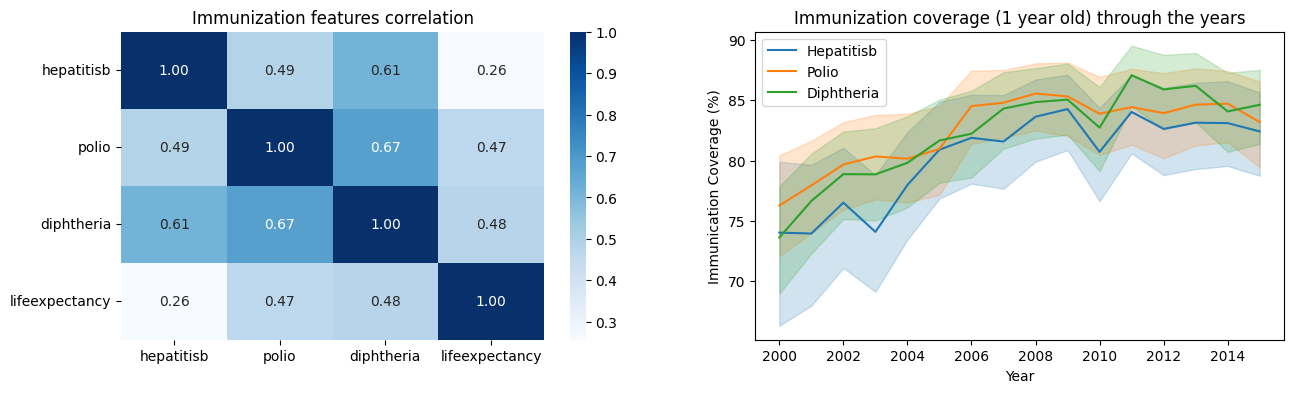

In [ ]:
# Get vaccination related columns
vaccines_cols = ["hepatitisb","polio","diphtheria","lifeexpectancy"]

# Calculate correlation with life expectancy
vaccine_corr = df[vaccines_cols].corr()

# Setup plot
fig, axes = plt.subplots(figsize=(15,4),ncols=2,nrows=1)

# Draw correlation matrix
sns.heatmap(vaccine_corr, annot=True, cmap="Blues", fmt='.2f',ax=axes[0])
axes[0].set_title("Immunization features correlation")

# Draw immuninization throughout the years
sns.lineplot(data=df, x="year", y="hepatitisb",ax=axes[1],label="Hepatitisb")
sns.lineplot(data=df, x="year", y="polio",ax=axes[1],label="Polio")
sns.lineplot(data=df, x="year", y="diphtheria",ax=axes[1], label="Diphtheria")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Immunication Coverage (%)")
axes[1].set_title("Immunization coverage (1 year old) through the years")

plt.show()


The plot above suggest the following:
*   The coverage of immunization among 1 year old seems to be **correlated with each other**, probably indicating that those who take one of the vaccines are more likely to take the others, one possible reason is that these vaccines are given all as part of a infant vaccination program, we could possibly do some feature engineering to aggregate these features into a single column.
*   In general, more **vaccination seems to indicate a stealdy positive increase in life expectancy**.
*   Throught the years immunization seems be increasing steadily, with a noticeble dip in 2010.

#### HIV and Measles cases effect on life expectancy

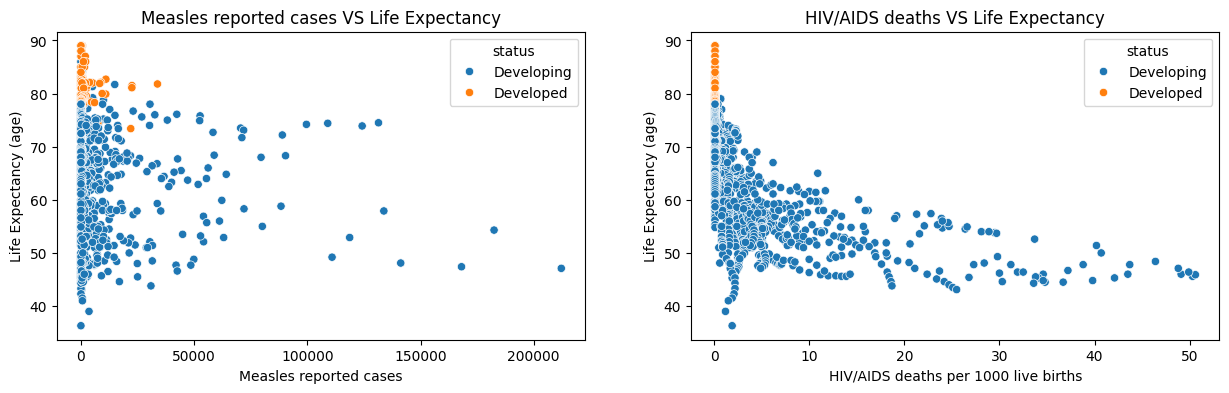

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(15,4),ncols=2,nrows=1)

# Measles cases vs life expectancy
sns.scatterplot(data=df, x="measles", y="lifeexpectancy",hue="status",ax=axes[0])
axes[0].set_title("Measles reported cases VS Life Expectancy")
axes[0].set_xlabel("Measles reported cases")
axes[0].set_ylabel("Life Expectancy (age)")

# HIV/AIDS cases vs life expectancy
sns.scatterplot(data=df, x="hiv/aids", y="lifeexpectancy",hue="status",ax=axes[1])
axes[1].set_title("HIV/AIDS deaths VS Life Expectancy")
axes[1].set_xlabel("HIV/AIDS deaths per 1000 live births")
axes[1].set_ylabel("Life Expectancy (age)")

plt.show()

* We have some extreme outliers on the right side, preventing us to have a accurate look on the relationship between `measles` cases and `life expectancy`. At first glance the amount of measles cases seems to have rather little effect on the life expectancy, but its suggested to take a second look after dealing with outliers.
* On the other hand, `HIV/AIDS` related deaths do seem to have some correlation with `life expectancy`, **the less deaths reported suggest a higher life expectancy**, we can also review this again after we deal with outliers.

#### Under Five Deaths vs Infants Deaths

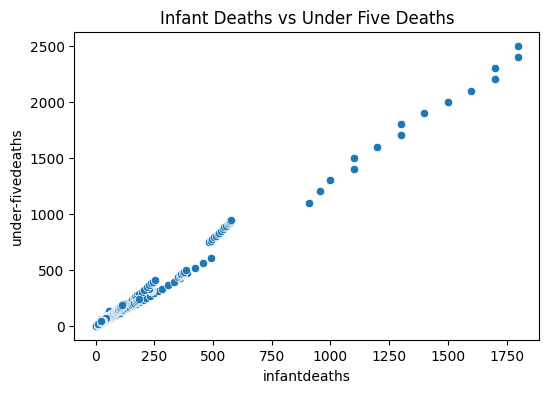

In [ ]:
# Review on both infant deaths columns
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, y="under-fivedeaths", x="infantdeaths")
plt.title("Infant Deaths vs Under Five Deaths")
plt.show()

The `infant deaths` and `under five deaths` seems to be measure the same or very similar metrics causing high correlated, to avoid multicollinearity we should drop one of the columns.

#### Thinness vs 1-19 years Thinness

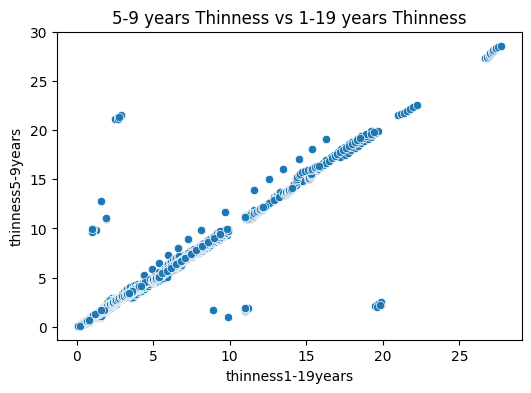

In [ ]:
# Review on both thinness columns
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, y="thinness5-9years", x="thinness1-19years")
plt.title("5-9 years Thinness vs 1-19 years Thinness")
plt.show()

* The 2 features are highly correlated despite covering 2 age ranges, to avoid multicollinearity its suggested to drop one of these column.
* Preferably `thinness1-19years` since the column is probably named incorrectly according to the data dictionary documentation **it should has been 10-19 years**.


#### Review BMI extremely high values

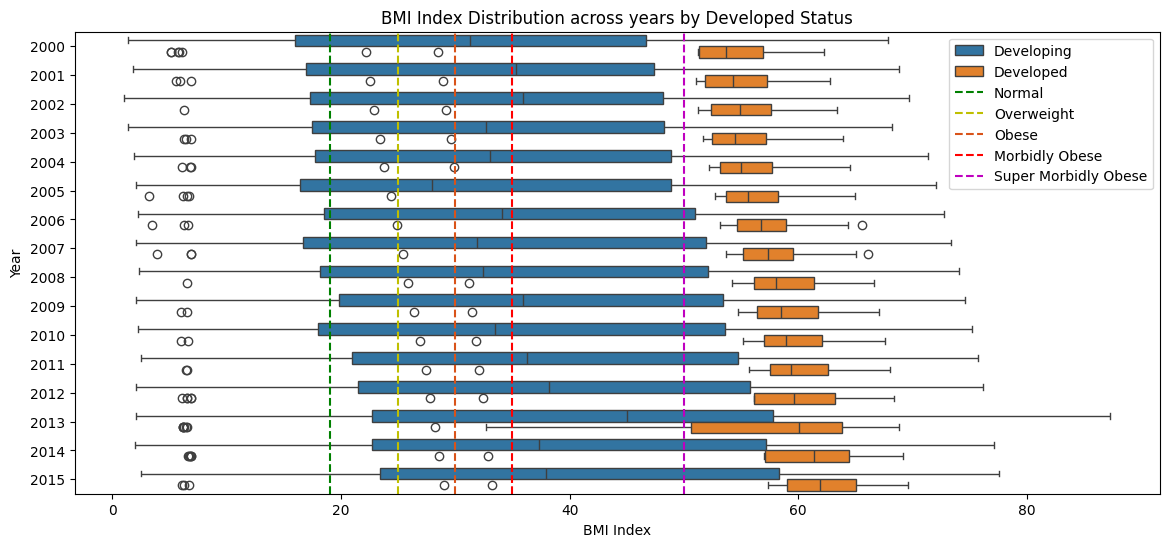

In [ ]:
# Setup plot
plt.figure(figsize=(14,6))

# Draw BMI distribution across the years group by developed status
sns.boxplot(data=df, x="bmi",y="year",hue="status",orient="h")

# Draw standard BMI classification for reference
plt.axvline(x=19,label='Normal', color='g', ls='--')
plt.axvline(x=25,label='Overweight', color='y', ls='--')
plt.axvline(x=30,label='Obese', color='#D95319', ls='--')
plt.axvline(x=35,label='Morbidly Obese', color='r', ls='--')
plt.axvline(x=50,label='Super Morbidly Obese', color='m', ls='--')

plt.legend()
plt.title("BMI Index Distribution across years by Developed Status")
plt.xlabel("BMI Index")
plt.ylabel("Year")

plt.show()

* The overall BMI data from the dataset has a median of **43.5**, which seems to suggest that most of the countries recorded are morbidly obese, which is highly unlikely.
* Similar trend is shown when we segment across the years, only in **2005** the median was slightly below the **obese** line, the rest are considered **obese** and above.
* Something noticeble is that there are only outliers for **developed countries**, and its group seeminly in 2 groups, **the extremely underweighted group** and the somewhat **regular BMI** range.
* Additionally, **the dataset suggest that developed countries seem to all be super morbidly obese** according to the standard segmentation.
* **Since we are not sure if this is to error during data collection process, its suggested to drop this column to avoid adding noise to our model.**

### Exploratory Data Analysis General Insights

The general insight from this analysis seems to indicate that life expectancy shows a steady increase over time for both developed and developing countries. Additionally this features seems to be quite an strong indicator of how high the our target value usually can get.

Overall we can also assume the following so far:

*   While developed countries tend to spend more on healthcare (8-9% of government expenditure) than developing countries (5-6%), a direct correlation between expenditure levels and life expectancy is not evident.  Significant variation in life expectancy exists among countries with similar healthcare spending.
*   `Schooling` and `income composition of resources` are strongly correlated with `life expectancy`, suggesting that better education and higher incomes contribute to longer lifespans. Although they both are also very correlated indicating possible multicollinearity.
*   `Alcohol` consumption does not appear to have a strong **negative correlation** with life expectancy, and developed nations show higher consumption rates.
*   Initial analysis suggests no correlation between `population`  size and life expectancy.  However, the presence of outliers needs further investigation.
*  Immunization coverage (Hepatitis B, Polio, Diphtheria) is positively correlated with life expectancy and shows an upward trend over time.
*  `Measles` cases do not seem strongly correlated with life expectancy possibly due to outliers, `HIV/AIDS` deaths on the other hand have a clear negative correlation.
*  There are several features highly correlated which should be dropped in order to avoid noise in our model.


These findings suggest that a model incorporating socioeconomic indicators (`schooling`, `income composition of resources`, `GDP`), `healthcare expenditure` (but potentially with care for multicollinearity), `mortality rates` (with outlier handling), and `immunization coverage` is likely to be effective in predicting life expectancy.  Further feature engineering combining correlated variables could improve model performance.  Outlier handling is critical for several variables.

### Data Preprocessing and Cleaning

In [ ]:
# Copy of the original dataset
df_clean = df.copy()

df_clean.shape

(2938, 22)

#### Dropping highly correlated columns

In [ ]:
# Removing features that we deem multi-correlated based on previous analysis and also with highly unlikely values.
to_drop = ['thinness1-19years','under-fivedeaths','bmi']
df_clean.drop(columns=to_drop, inplace=True)

df_clean.shape

(2938, 19)

#### Dealing with missing values

In [ ]:
# Check missing values
df_clean.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

population                      652
hepatitisb                      553
gdp                             448
totalexpenditure                226
alcohol                         194
incomecompositionofresources    167
schooling                       163
thinness5-9years                 34
polio                            19
diphtheria                       19
lifeexpectancy                   10
adultmortality                   10
dtype: int64

The columns with the most missing values are: `population`, `hepatitisb`, `gdp`.

In [ ]:
# Filling missing columns (imputing) with median and mode.

## Initiating the Imputers
simple_median = SimpleImputer(strategy='median')
simple_mode = SimpleImputer(strategy='most_frequent')

## Getting Category columns and Numerical columns
cat_cols = df_clean.select_dtypes(include='object').columns.to_list()
num_cols = df_clean.select_dtypes(include=np.number).columns.to_list()

## Filling the missing values (Imputation)
df_clean[num_cols] = simple_median.fit_transform(df_clean[num_cols])
df_clean[cat_cols] = simple_mode.fit_transform(df_clean[cat_cols])

# Review missing values
df_clean.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

lifeexpectancy                  0
adultmortality                  0
alcohol                         0
hepatitisb                      0
polio                           0
totalexpenditure                0
diphtheria                      0
gdp                             0
population                      0
thinness5-9years                0
incomecompositionofresources    0
schooling                       0
dtype: int64

#### Dealing with Outliers

In [ ]:
# Define functions to tackle outliers

## Function to winsorize outliers
def winsorize_outliers(df, column: str, method="default", lower_percentile=0.05, upper_percentile=0.95):
  '''
    Function to Winsorize outliers based on percentile thresholds.

    Params:
    df: Dataframe
      Dataset with the data and columns.
    column: str
      Column name to Winsorize.
    method: str
      Method for dealing with outliers (default is percentile based)
    lower_percentile: float
      Lower percentile for Winsorization (default is 5%).
    upper_percentile: float
      Upper percentile for Winsorization (default is 95%).

    Returns:
    winsorized_col: Series
      Column with Winsorized values.
  '''

  if method != "iqr":
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
  else:
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)

  # Replace outliers with the nearest threshold
  winsorized_col = np.clip(df[column], lower_bound, upper_bound)

  return winsorized_col

# General purpose function to compare a column outlier using boxplot
def compare_columns(old_column,new_column):
  '''
    Function to Winsorize outliers based on percentile thresholds.

    Params:
    old_column: Series
      Series with original data.
    new_column: Series
      Series with new winsored data.

    Returns: None
  '''
  fig, axes = plt.subplots(figsize=(10,2),ncols=2,nrows=1)
  sns.boxplot(old_column,orient="h", ax=axes[0])
  axes[0].set_title("Original")

  sns.boxplot(new_column,orient="h", ax=axes[1])
  axes[1].set_title("Winsorized")

  plt.show()

  return None

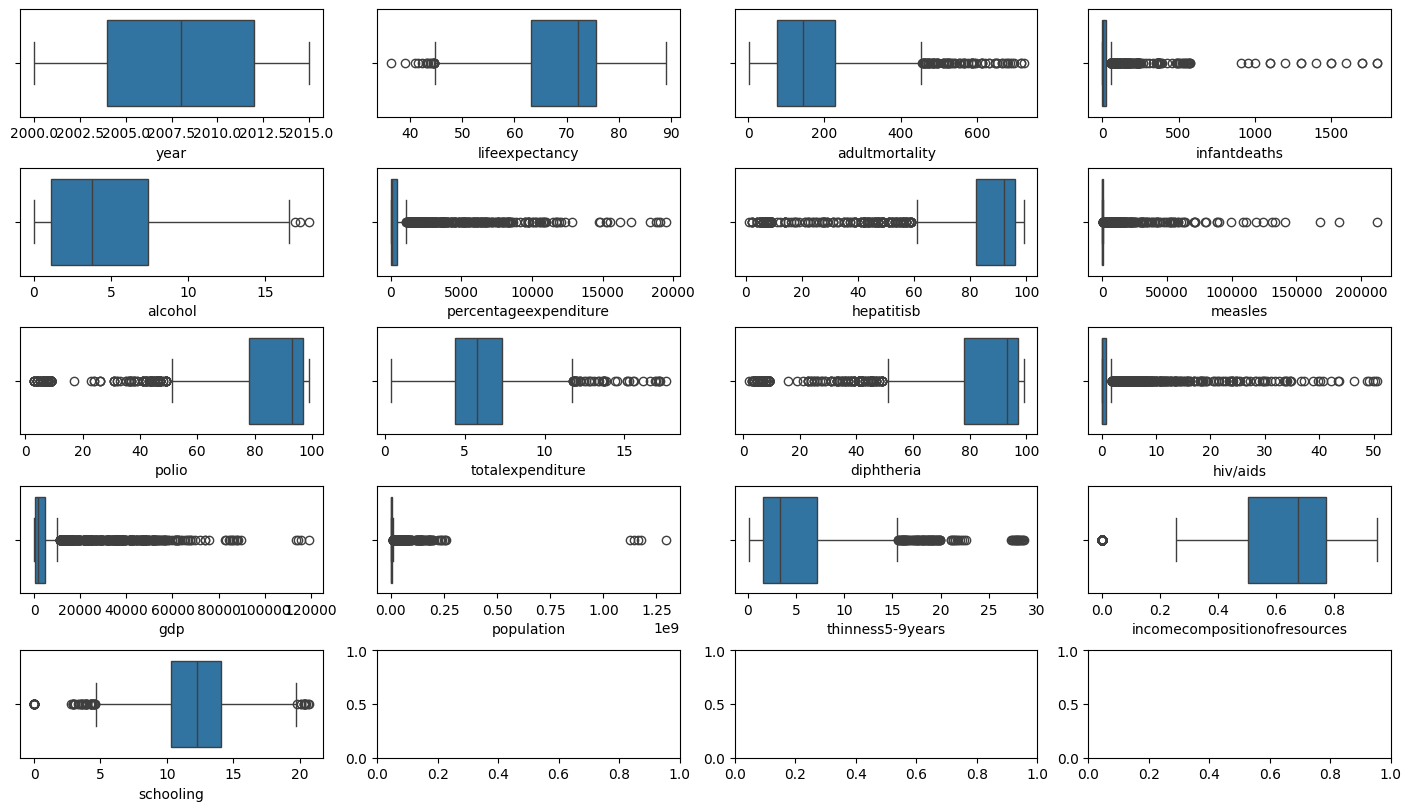

In [ ]:
# Display current outliers
plot_outliers(df_clean,num_cols)

In [ ]:
# Winzoring all the columns with outliers base on the directly of the tail.

# Left Skewed Columns
left_outliers = ["lifeexpectancy","polio","hepatitisb","diphtheria","incomecompositionofresources"]
for col in left_outliers:
  winsored_column = winsorize_outliers(df_clean,col,lower_percentile=0.01,upper_percentile=0)
  df_clean[col]=winsored_column
  #compare_columns(old_column=df[col],new_column=winsored_column)

# Right Skewed Columns
right_outliers = ["adultmortality","infantdeaths","alcohol","measles","totalexpenditure","gdp","percentageexpenditure","hiv/aids","population","thinness5-9years"]
for col in right_outliers:
  winsored_column = winsorize_outliers(df_clean,col,lower_percentile=0,upper_percentile=0.99)
  df_clean[col]=winsored_column
  #compare_columns(old_column=df[col],new_column=winsored_column)

# Generally Skewed Columns
both_outliers = ["schooling"]
for col in both_outliers:
  winsored_column = winsorize_outliers(df_clean,col,lower_percentile=0.01,upper_percentile=0.99)
  df_clean[col]=winsored_column
  #compare_columns(old_column=df[col],new_column=winsored_column)


### Exploratory Data Analysis (Round 2)

#### General outliers review (after cleaning)

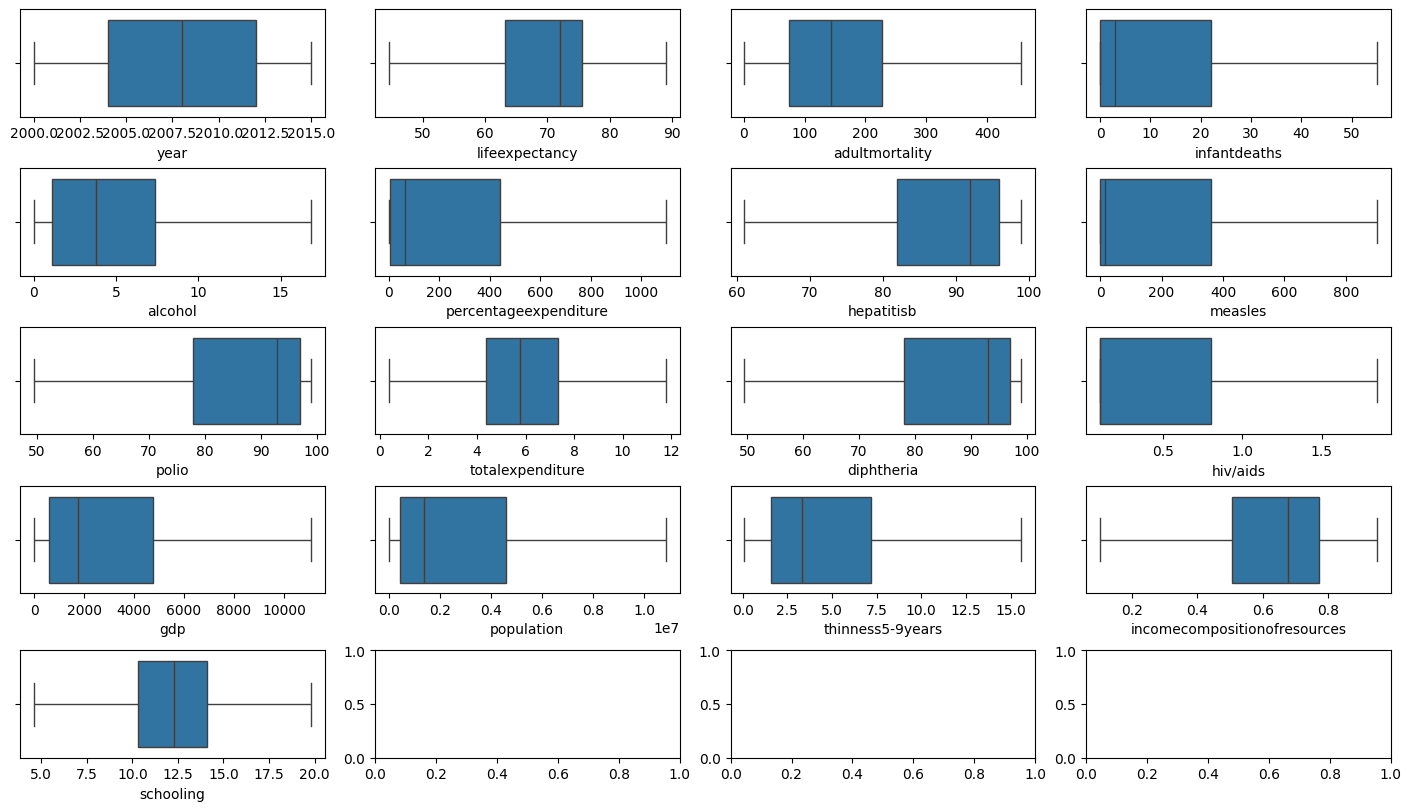

In [ ]:
# Review outliers
plot_outliers(df_clean,num_cols)

#### Feature correlation matrix (after cleaning)

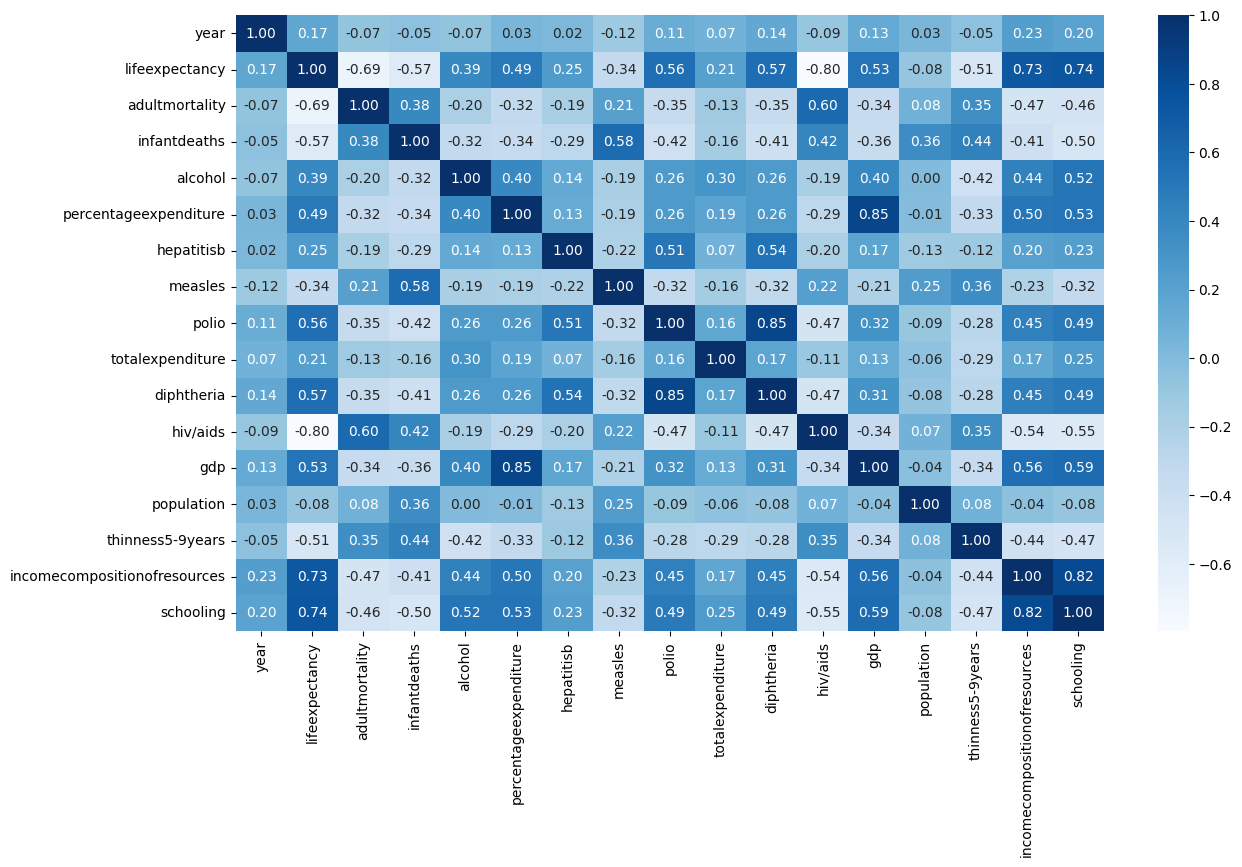

In [ ]:
# Plot feature correlation matrix after cleaning dataset
plt.figure(figsize=(14, 8))
sns.heatmap(df_clean[num_cols].corr(), annot=True, cmap="Blues", fmt='.2f')
plt.show()

#### Population relation with life expectancy (after cleaning)

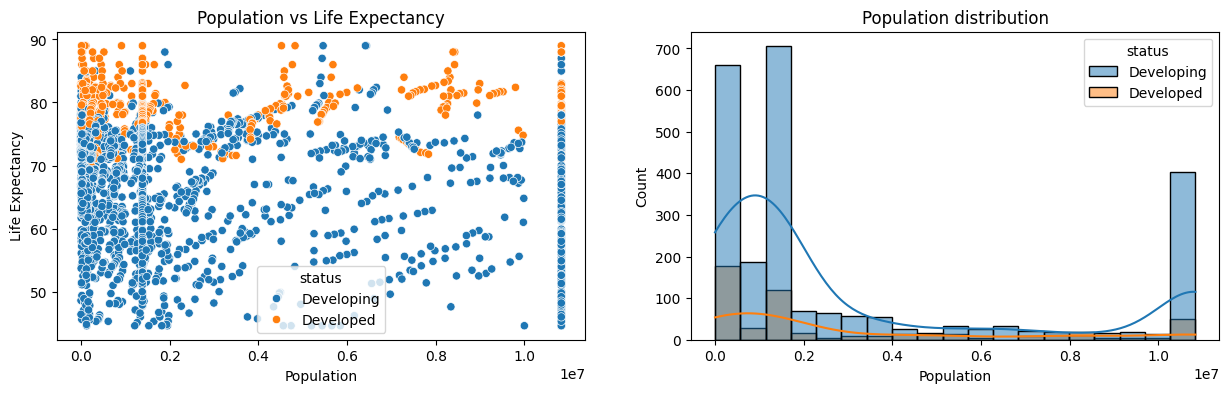

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(15,4),ncols=2,nrows=1)

# Population vs life expectancy
sns.scatterplot(data=df_clean, x="population", y="lifeexpectancy",hue="status",ax=axes[0])
axes[0].set_title("Population vs Life Expectancy")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Life Expectancy")

# Population distribution by developed status
sns.histplot(data=df_clean, x="population",hue="status",kde=True,ax=axes[1])
axes[1].set_title("Population distribution")
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Count")

plt.show()

We previously questioned whether `population` had a strong correlation with `life expectancy`, after dealing with the initial extreme outliers, the graph seems to indicate that the relationship is not that strong as it show quite a sparse distribution.

#### How does infant and adult deaths affect life expectancy (after cleaning)

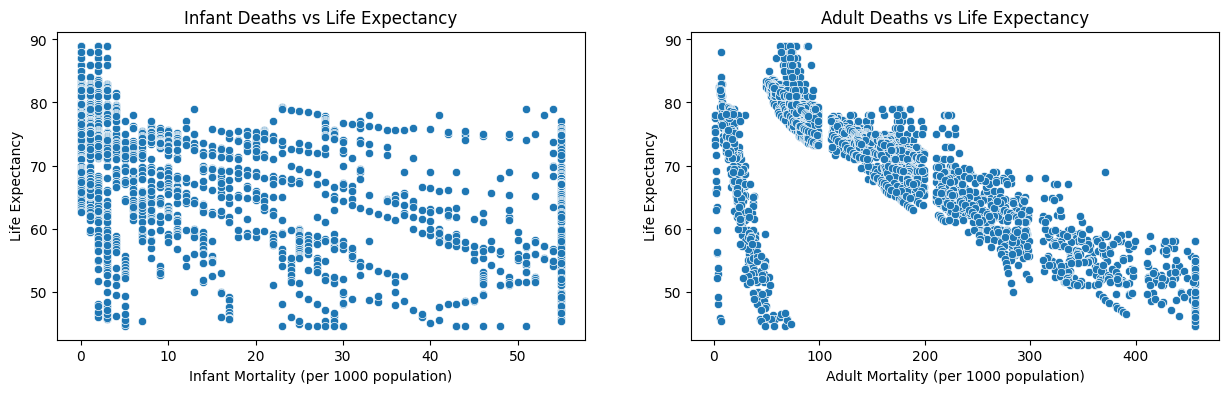

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(15,4),ncols=2,nrows=1)

# Infant death vs life expectancy
sns.scatterplot(data=df_clean, x="infantdeaths", y="lifeexpectancy",ax=axes[0])
axes[0].set_title("Infant Deaths vs Life Expectancy")
axes[0].set_xlabel("Infant Mortality (per 1000 population)")
axes[0].set_ylabel("Life Expectancy")

# Adult mortality vs life expectancy
sns.scatterplot(data=df_clean, x="adultmortality", y="lifeexpectancy",ax=axes[1])
axes[1].set_title("Adult Deaths vs Life Expectancy")
axes[1].set_xlabel("Adult Mortality (per 1000 population)")
axes[1].set_ylabel("Life Expectancy")

plt.show()

We previously questioned whether `infant deaths` and `adult deaths` had  strong correlation with `life expectancy`, after dealing with the the outliers:
* `infant deaths` correlation increased noticeably **going from -0.2 to -0.57**.
* `adult deaths` also had some outliers but after cleaning, the correlation didnt not got affected in a meaninful way (decreasing 0.01).

 #### Percentage of GDP spent on healthcare vs life expectancy (after cleaning)

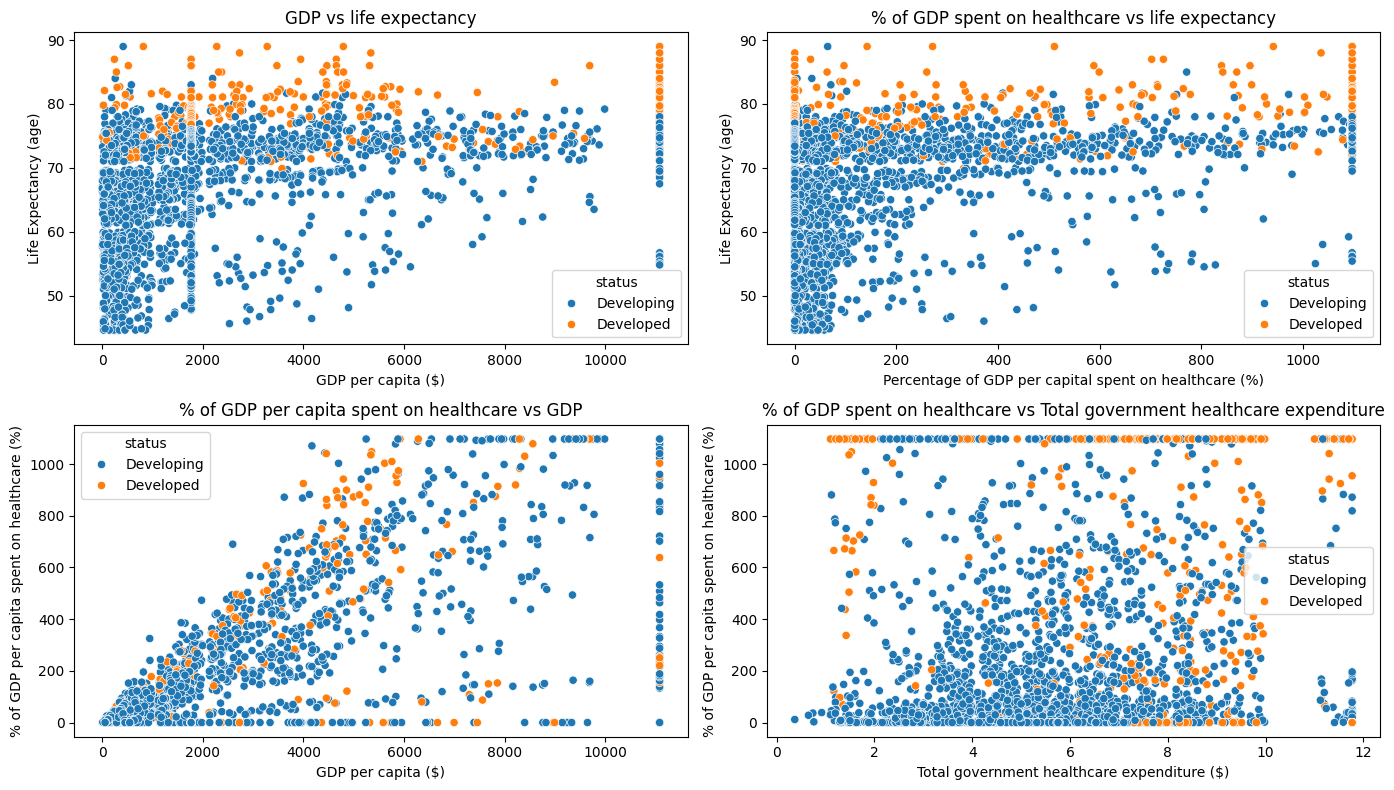

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(14,8),ncols=2,nrows=2)

# gdp per capita vs life expectancy
sns.scatterplot(data=df_clean, x="gdp", y="lifeexpectancy",hue="status",ax=axes[0,0])
axes[0,0].set_title("GDP vs life expectancy")
axes[0,0].set_xlabel("GDP per capita ($)")
axes[0,0].set_ylabel("Life Expectancy (age)")

# Percentage of GDP per capita spent on health vs life expectancy
sns.scatterplot(data=df_clean, x="percentageexpenditure", y="lifeexpectancy",hue="status",ax=axes[0,1])
axes[0,1].set_title("% of GDP spent on healthcare vs life expectancy")
axes[0,1].set_xlabel("Percentage of GDP per capital spent on healthcare (%)")
axes[0,1].set_ylabel("Life Expectancy (age)")

# Percentage of GDP per capita spent on health vs GDP per capita
sns.scatterplot(data=df_clean, y="percentageexpenditure", x="gdp",hue="status",ax=axes[1,0])
axes[1,0].set_title("% of GDP per capita spent on healthcare vs GDP")
axes[1,0].set_ylabel("% of GDP per capita spent on healthcare (%)")
axes[1,0].set_xlabel("GDP per capita ($)")

# Percentage of GDP per capita spent on health vs health expenditure percentage
sns.scatterplot(data=df_clean, y="percentageexpenditure", x="totalexpenditure",hue="status",ax=axes[1,1])
axes[1,1].set_title("% of GDP spent on healthcare vs Total government healthcare expenditure")
axes[1,1].set_ylabel("% of GDP per capita spent on healthcare (%)")
axes[1,1].set_xlabel("Total government healthcare expenditure ($)")

plt.tight_layout()
plt.show()

As `percentage expenditure` was one of our columns with most outliers (300+) its suggested to review how the cleaning affected its relation with `life expectancy`, similarly with `total expenditure`.

*   `GDP` and `life expectancy` correlation **increased from 0.46 to 0.53**
*   `percentage expenditure` and `GDP` are still very much correlated.
*   `percentage expenditure`  and `life expectancy` **increased from 0.38 to 0.49**.
*   `total expenditure` and `life expectancy` correlation decreases in a non meaninful amount (0.01)



#### HIV and Measles Death correlation with life Expectancy (after cleaning)

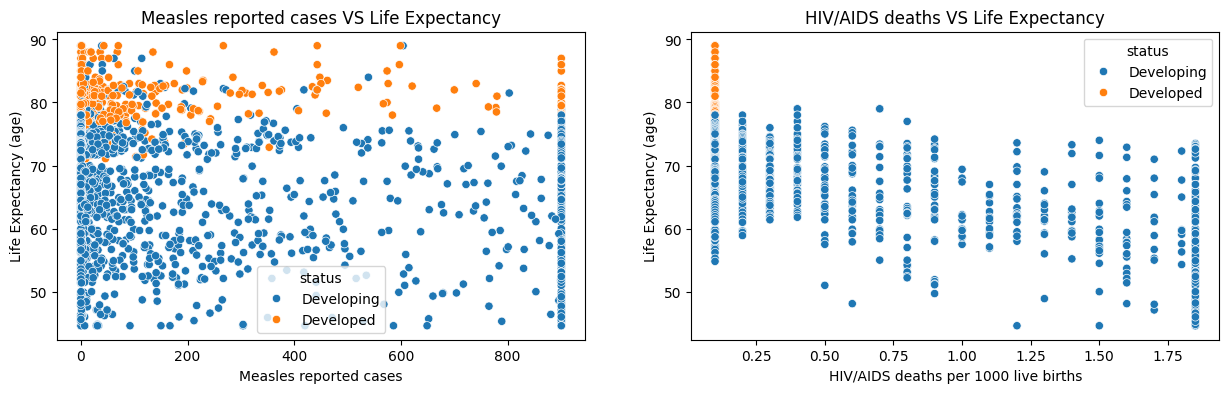

In [ ]:
# Setup plot
fig, axes = plt.subplots(figsize=(15,4),ncols=2,nrows=1)

# Measles vs life expectancy
sns.scatterplot(data=df_clean, x="measles", y="lifeexpectancy",hue="status",ax=axes[0])
axes[0].set_title("Measles reported cases VS Life Expectancy")
axes[0].set_xlabel("Measles reported cases")
axes[0].set_ylabel("Life Expectancy (age)")

# HIV/AIDS vs expectancy
sns.scatterplot(data=df_clean, x="hiv/aids", y="lifeexpectancy",hue="status",ax=axes[1])
axes[1].set_title("HIV/AIDS deaths VS Life Expectancy")
axes[1].set_xlabel("HIV/AIDS deaths per 1000 live births")
axes[1].set_ylabel("Life Expectancy (age)")

plt.show()

`measles` and `hiv/aids` were between the top 3 features with most outliers (500+), after cleaning the data, the previous correlation with `life expectancy` seems to have **increased meaningfully**:
* Specially on `hiv/aids` going **from -0.54 to -0.80.**
* On `measles` the increases was not as big but still went **from -0.16 to -0.34 **.

## Construct
In this phase we will determine determine the type of problem the model is trying to solve, which in this case is clearly a regression problem, where we are trying to determine what is the life expectancy based on the submitted features.

We have several models we could use and compare in order to determine which one is better suited for us.

Linear Regression, sensible to outliers
Decision Tree, prone to overfitting
Random Forest, computationally expensive
ADABoost, prone to overfitting and computationally expensive

### Model Building (base)

#### Linear Regression

In [ ]:
### Separating features and target
X = df_clean.drop(columns=["lifeexpectancy"])
y = df_clean["lifeexpectancy"]

In [ ]:
### Feature encoding
# One Hot Encoding Status
X["status"] = pd.get_dummies(X["status"],drop_first=True)
X.head()

country    year  status  adultmortality  infantdeaths  alcohol  \
0  Afghanistan  2015.0    True           263.0          55.0     0.01   
1  Afghanistan  2014.0    True           271.0          55.0     0.01   
2  Afghanistan  2013.0    True           268.0          55.0     0.01   
3  Afghanistan  2012.0    True           272.0          55.0     0.01   
4  Afghanistan  2011.0    True           275.0          55.0     0.01   

   percentageexpenditure  hepatitisb  measles  polio  totalexpenditure  \
0              71.279624        65.0  900.625   49.5              8.16   
1              73.523582        62.0  492.000   58.0              8.18   
2              73.219243        64.0  430.000   62.0              8.13   
3              78.184215        67.0  900.625   67.0              8.52   
4               7.097109        68.0  900.625   68.0              7.87   

   diphtheria  hiv/aids         gdp   population  thinness5-9years  \
0        65.0       0.1  584.259210  10832552.25              15.6   
1        62.0       0.1  612.696514    327582.00              15.6   
2        64.0       0.1  631.744976  10832552.25              15.6   
3        67.0       0.1  669.959000   3696958.00              15.6   
4        68.0       0.1   63.537231   2978599.00              15.6   

   incomecompositionofresources  schooling  
0                         0.479       10.1  
1                         0.476       10.0  
2                         0.470        9.9  
3                         0.463        9.8  
4                         0.454        9.5

In [ ]:
### Normalizing Years
X["year"] = X["year"] - X["year"].min()
X.head()

country  year  status  adultmortality  infantdeaths  alcohol  \
0  Afghanistan  15.0    True           263.0          55.0     0.01   
1  Afghanistan  14.0    True           271.0          55.0     0.01   
2  Afghanistan  13.0    True           268.0          55.0     0.01   
3  Afghanistan  12.0    True           272.0          55.0     0.01   
4  Afghanistan  11.0    True           275.0          55.0     0.01   

   percentageexpenditure  hepatitisb  measles  polio  totalexpenditure  \
0              71.279624        65.0  900.625   49.5              8.16   
1              73.523582        62.0  492.000   58.0              8.18   
2              73.219243        64.0  430.000   62.0              8.13   
3              78.184215        67.0  900.625   67.0              8.52   
4               7.097109        68.0  900.625   68.0              7.87   

   diphtheria  hiv/aids         gdp   population  thinness5-9years  \
0        65.0       0.1  584.259210  10832552.25              15.6   
1        62.0       0.1  612.696514    327582.00              15.6   
2        64.0       0.1  631.744976  10832552.25              15.6   
3        67.0       0.1  669.959000   3696958.00              15.6   
4        68.0       0.1   63.537231   2978599.00              15.6   

   incomecompositionofresources  schooling  
0                         0.479       10.1  
1                         0.476       10.0  
2                         0.470        9.9  
3                         0.463        9.8  
4                         0.454        9.5

In [ ]:
### Target (Mean) Encoding country to reduce dimensionality from one hot encoding but still maintaining relationship with our target.

# Calculate the mean life expectancy for each country
mean_life_expectancy_by_country = df_clean.groupby('country')['lifeexpectancy'].mean()

# Create a new column with the target encoded values
X['country_encoded'] = X['country'].map(mean_life_expectancy_by_country)

# Dropping original country column
X.drop(columns=['country'], inplace=True)

X.head()

year  status  adultmortality  infantdeaths  alcohol  percentageexpenditure  \
0  15.0    True           263.0          55.0     0.01              71.279624   
1  14.0    True           271.0          55.0     0.01              73.523582   
2  13.0    True           268.0          55.0     0.01              73.219243   
3  12.0    True           272.0          55.0     0.01              78.184215   
4  11.0    True           275.0          55.0     0.01               7.097109   

   hepatitisb  measles  polio  totalexpenditure  diphtheria  hiv/aids  \
0        65.0  900.625   49.5              8.16        65.0       0.1   
1        62.0  492.000   58.0              8.18        62.0       0.1   
2        64.0  430.000   62.0              8.13        64.0       0.1   
3        67.0  900.625   67.0              8.52        67.0       0.1   
4        68.0  900.625   68.0              7.87        68.0       0.1   

          gdp   population  thinness5-9years  incomecompositionofresources  \
0  584.259210  10832552.25              15.6                         0.479   
1  612.696514    327582.00              15.6                         0.476   
2  631.744976  10832552.25              15.6                         0.470   
3  669.959000   3696958.00              15.6                         0.463   
4   63.537231   2978599.00              15.6                         0.454   

   schooling  country_encoded  
0       10.1         58.19375  
1       10.0         58.19375  
2        9.9         58.19375  
3        9.8         58.19375  
4        9.5         58.19375

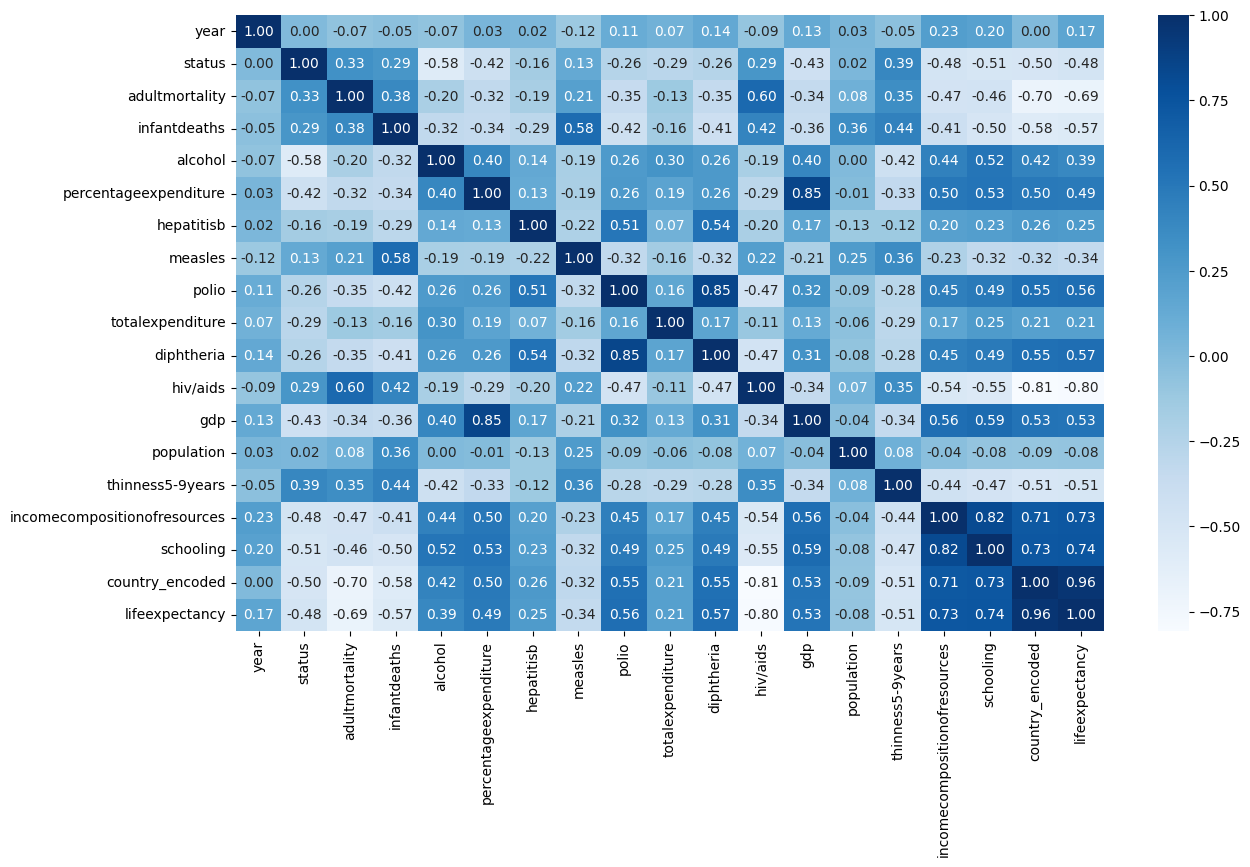

In [ ]:
# Review correlation
plt.figure(figsize=(14, 8))
sns.heatmap(pd.concat([X,y],axis=1).corr(), annot=True, cmap="Blues", fmt='.2f')
plt.show()

We can observe that after encoding country the feature have become extremely correlated with life expectancy, we will first build a base model with this column and see how it perform, and later consider whether we should keep it or not.

In [ ]:
### Splitting data into Train and Test

# Final evaluation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and Validation set
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
### Initialization
lm = LinearRegression()

In [ ]:
### Training the model
lm.fit(X_train_v, y_train_v)

LinearRegression()

In [ ]:
### Model Characteristics
print(lm.coef_)
print(lm.intercept_)

[ 3.30568331e-01 -1.99695687e-01 -1.45419768e-03 -7.67341800e-04
 -2.62003257e-02  6.16478149e-04 -1.99698868e-02 -2.55245734e-04
  5.54077197e-03 -2.37766460e-02  1.37649327e-02 -2.61632688e-01
 -6.80456448e-05  4.77994715e-10 -6.02329736e-03  1.60869394e-01
  7.72333499e-03  9.56565029e-01]
1.4178193755993362


In [ ]:
### General purpose function to get metrics result from model prediction
def get_results(model_name: str,y_val,y_pred):
  r2 = r2_score(y_val, y_pred)
  mse = mean_squared_error(y_val, y_pred)
  mae = mean_absolute_error(y_val, y_pred)
  rmse = np.sqrt(mse)

  results = pd.DataFrame(data=[[model_name,r2,mse,mae,rmse]],columns=["Model","R2","MSE","MAE","RMSE"])
  return results

###  Draw plot of the regresion result of the model
def draw_results(model:str, y, y_pred):
  sns.scatterplot(x=y_pred, y=y)
  plt.xlabel("Actual Life Expectancy")
  plt.ylabel("Predicted Life Expectancy")
  plt.title(f"Predicted vs Actual ({model})")
  plt.show()

In [ ]:
### Model Validation
y_val_pred = lm.predict(X_val)

In [ ]:
### Validation Metrics
lm_results = get_results("Linear Regression",y_val,y_val_pred)
lm_results.head()

Model        R2       MSE       MAE      RMSE
0  Linear Regression  0.958403  3.818187  1.285807  1.954018

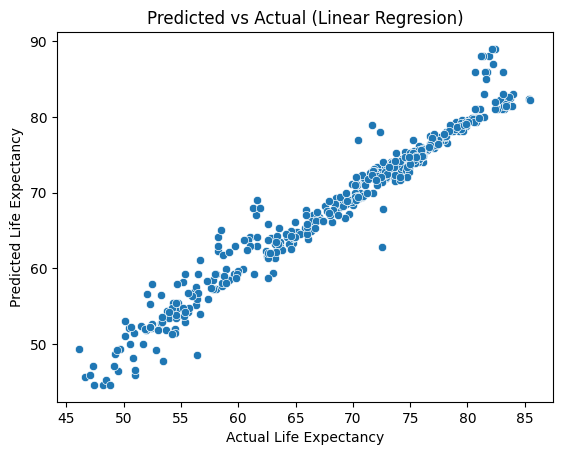

In [ ]:
###  Draw plot of the regresion result of the model
draw_results("Linear Regresion",y_val,y_val_pred)

#### Decision Tree

In [ ]:
### Initialization
dt = DecisionTreeRegressor(random_state=42)

In [ ]:
### Gridsearch to find the best hyperparameters for the model.
cv_parameters= {
    'max_depth': [2, 6, 10, 14, 20, None],
    'min_samples_leaf': [2, 5, 8],
    'min_samples_split': [2, 6, 10],
}

dt_grid = GridSearchCV(dt, cv_parameters, cv=5, scoring="neg_mean_squared_error")

### Train the model
dt_grid.fit(X_train_v, y_train_v)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [2, 6, 10, 14, 20, None],
                         'min_samples_leaf': [2, 5, 8],
                         'min_samples_split': [2, 6, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
### Model Validation
y_val_pred = dt_grid.best_estimator_.predict(X_val)

In [ ]:
### Validation Metrics
dt_results = get_results("Decision Tree",y_val,y_val_pred)
dt_results.head()

Model        R2       MSE       MAE      RMSE
0  Decision Tree  0.968793  2.864443  1.125365  1.692467

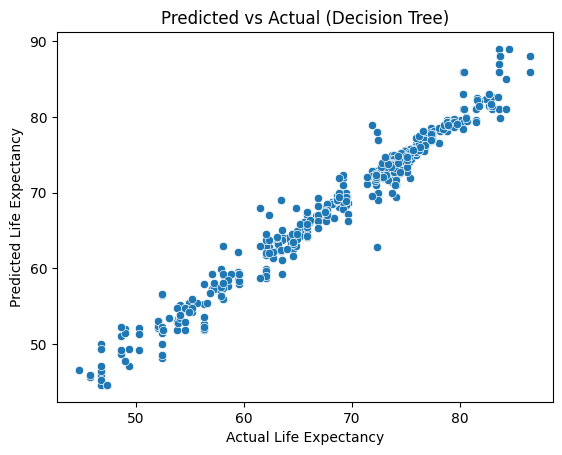

In [ ]:
###  Draw plot of the regresion result of the model
draw_results("Decision Tree",y_val,y_val_pred)

#### Random Forest

In [ ]:
### Initialization
rf = RandomForestRegressor(random_state=42)

In [ ]:
# Gridsearch to find the best hyperparameters
cv_parameters= {
    'max_depth': [2, 20, None],
    'min_samples_leaf': [2, 5, 8],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 300],
    'max_samples': [0.7, 1.0],
    'max_features': [1.0]
}

rf_grid = GridSearchCV(rf, cv_parameters, cv=5, scoring="neg_mean_squared_error")

### Train the model
rf_grid.fit(X_train_v,y_train_v)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 20, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
### Model Validation
y_val_pred = rf_grid.best_estimator_.predict(X_val)

In [ ]:
### Validation Metrics
rf_results = get_results("Random Forest",y_val,y_val_pred)
rf_results.head()

Model        R2       MSE       MAE      RMSE
0  Random Forest  0.976807  2.128903  0.853244  1.459076

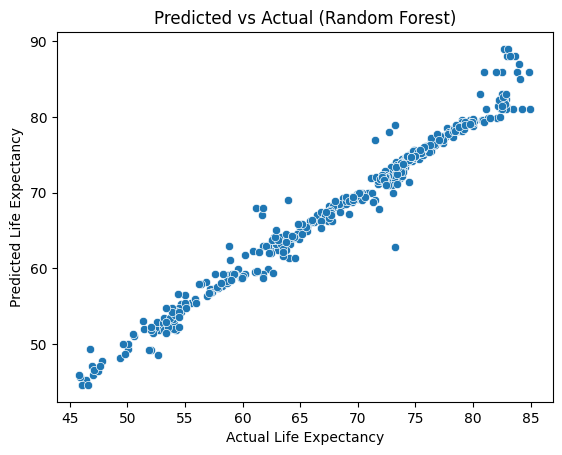

In [ ]:
###  Draw plot of the regresion result of the model
draw_results("Random Forest",y_val,y_val_pred)

#### ADABoost

In [ ]:
### Initialization
ada = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)

In [ ]:
# Gridsearch to find the best hyperparameters
cv_parameters = {
    'n_estimators': [50, 100, 200],              # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5, 1],       # Step size for each boosting round
    'estimator__max_depth': [1, 3, 5, 7],       # Maximum depth of the base decision tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

ada_grid = GridSearchCV(ada, cv_parameters, cv=5, scoring="neg_mean_squared_error")

### Train the model
ada_grid.fit(X_train_v,y_train_v)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42),
                                         random_state=42),
             param_grid={'estimator__max_depth': [1, 3, 5, 7],
                         'estimator__min_samples_split': [2, 5, 10],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
### Model Validation
y_val_pred = ada_grid.best_estimator_.predict(X_val)

In [ ]:
### Validation Metrics
ada_results = get_results("ADA Booster",y_val,y_val_pred)
ada_results.head()

Model       R2       MSE       MAE      RMSE
0  ADA Booster  0.97272  2.504004  0.999106  1.582405

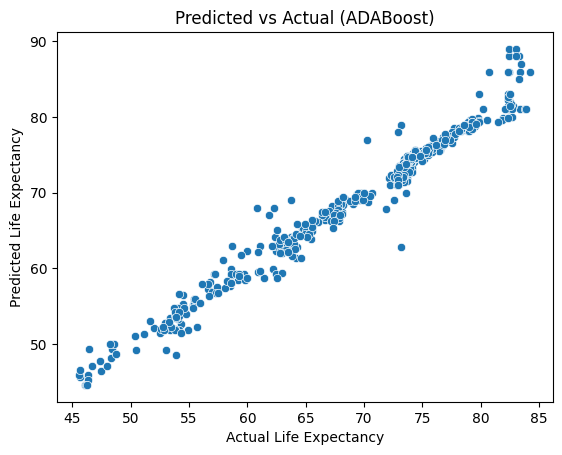

In [ ]:
###  Draw plot of the regresion result of the model
draw_results("ADABoost",y_val,y_val_pred)

### Model Selection (base)

In [ ]:
### Compare all metrics to choose the best model
compare_results = pd.concat([lm_results, dt_results,rf_results,ada_results], ignore_index=True)
compare_results.sort_values(by="MSE",ascending=True)

Model        R2       MSE       MAE      RMSE
2      Random Forest  0.976807  2.128903  0.853244  1.459076
3        ADA Booster  0.972720  2.504004  0.999106  1.582405
1      Decision Tree  0.968793  2.864443  1.125365  1.692467
0  Linear Regression  0.958403  3.818187  1.285807  1.954018

The results shows that **Random Forest** outperformed slightly the others models as evidenced by the **lower Mean Squared Error (2.13)** and **higher R2 0.97**.

### Model Evaluation (base)

In [ ]:
# Use test split to evaluate the champion model
y_pred = rf_grid.best_estimator_.predict(X_test)

In [ ]:
# Evaluation Metrics
results = get_results("Random Forest",y_test,y_pred)
results.head()

Model       R2       MSE       MAE      RMSE
0  Random Forest  0.97425  2.228406  0.883731  1.492785

The final results, with the testing set, shown from the evaluation metrics are very promising, with a **MSE of 2.23** and a **R2 of 97%**.

#### Feature Importance

In [ ]:
# Get features importance from model
feature_importance = rf_grid.best_estimator_.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})

# Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

feature_importance_df

Feature  Importance
17               country_encoded    0.927454
0                           year    0.030857
2                 adultmortality    0.014144
15  incomecompositionofresources    0.005452
16                     schooling    0.003644
14              thinness5-9years    0.002559
4                        alcohol    0.002244
9               totalexpenditure    0.002146
13                    population    0.001704
3                   infantdeaths    0.001631
7                        measles    0.001560
8                          polio    0.001278
5          percentageexpenditure    0.001118
11                      hiv/aids    0.001117
12                           gdp    0.001099
10                    diphtheria    0.001080
6                     hepatitisb    0.000859
1                         status    0.000056

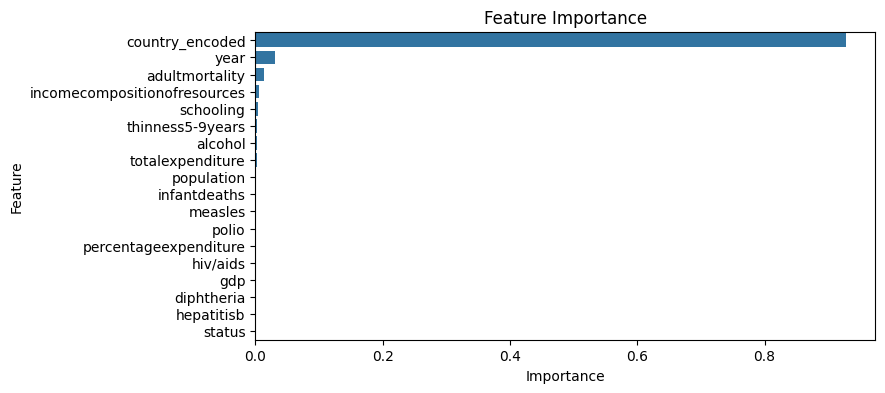

In [ ]:
# Plot Importance
plt.figure(figsize=(8,4))
sns.barplot(x='Importance',y='Feature',data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

#### Hypothesis

The graph suggest that our `country_encoded` feature is **extremely good** at predicting `life expectancy`, this make a lot of sense since we enconded `country` with the mean of our target value by each country (to avoid high dimentionality) and the **resulted correlation was extremely high**.

Providing `country` give the model a strong hint on what is the `life expectancy`. That being said, Random Forest models **aren't particularly good at what we call extrapolation**, meaning producing results outside of our training data.

Which for the problem we are trying to solve isn't really that helpful, since we would want to predict `life expectancy` based on **immnunization, economic, social and other health related factors** for whichever country.

To accomplish that we would need to generalize more our model our use one that could extrapolate. Now that we have our based model we could do some feature selection and engineering to simplify our model for more generalization and better interpretability.

### Features Selection









In [ ]:
## Lets build a new training and testing set from the beginning
df_select = df_clean.copy()

#### Dropping Country and features with multicollinearity

As we mentioned before, we will drop `country` in other to achieve more **generalization** in our model. Additionally we shall drop:
* `incomecompositionofresources` as it have **collinearity** with our target and `schooling`.
* `percentageexpenditure` as is have **collinearity** with our target and `gdp`.

In [ ]:
## Lets drop the following columns:
df_select = df_select.drop(columns=["country","incomecompositionofresources","percentageexpenditure"])
df_select.head()

year      status  lifeexpectancy  adultmortality  infantdeaths  alcohol  \
0  2015.0  Developing            65.0           263.0          55.0     0.01   
1  2014.0  Developing            59.9           271.0          55.0     0.01   
2  2013.0  Developing            59.9           268.0          55.0     0.01   
3  2012.0  Developing            59.5           272.0          55.0     0.01   
4  2011.0  Developing            59.2           275.0          55.0     0.01   

   hepatitisb  measles  polio  totalexpenditure  diphtheria  hiv/aids  \
0        65.0  900.625   49.5              8.16        65.0       0.1   
1        62.0  492.000   58.0              8.18        62.0       0.1   
2        64.0  430.000   62.0              8.13        64.0       0.1   
3        67.0  900.625   67.0              8.52        67.0       0.1   
4        68.0  900.625   68.0              7.87        68.0       0.1   

          gdp   population  thinness5-9years  schooling  
0  584.259210  10832552.25              15.6       10.1  
1  612.696514    327582.00              15.6       10.0  
2  631.744976  10832552.25              15.6        9.9  
3  669.959000   3696958.00              15.6        9.8  
4   63.537231   2978599.00              15.6        9.5

### Feature Engineering

#### Combining immunization related features

Since we have 3 different vaccination features that measures the coverage (%) among the same group (1 years olds) we can simplify them by combining the 3 columns, this would help us:

*   Capture Aggregate Vaccination Impact
*   Reduce Dimensionality
*   Simplify interpretation
*   Avoid colinearity



In [ ]:
# Apply geometric mean to combine our features
immunization = df_select["hepatitisb"] * df_select["polio"] * df_select["diphtheria"]
df_select["immunization"] = immunization ** (1/3)

# Drop our original features
df_select = df_select.drop(columns=["hepatitisb","polio","diphtheria"])
df_select.head()

year      status  lifeexpectancy  adultmortality  infantdeaths  alcohol  \
0  2015.0  Developing            65.0           263.0          55.0     0.01   
1  2014.0  Developing            59.9           271.0          55.0     0.01   
2  2013.0  Developing            59.9           268.0          55.0     0.01   
3  2012.0  Developing            59.5           272.0          55.0     0.01   
4  2011.0  Developing            59.2           275.0          55.0     0.01   

   measles  totalexpenditure  hiv/aids         gdp   population  \
0  900.625              8.16       0.1  584.259210  10832552.25   
1  492.000              8.18       0.1  612.696514    327582.00   
2  430.000              8.13       0.1  631.744976  10832552.25   
3  900.625              8.52       0.1  669.959000   3696958.00   
4  900.625              7.87       0.1   63.537231   2978599.00   

   thinness5-9years  schooling  immunization  
0              15.6       10.1     59.357733  
1              15.6       10.0     60.636919  
2              15.6        9.9     63.326266  
3              15.6        9.8     67.000000  
4              15.6        9.5     68.000000

#### Feature Encoding Status

In [ ]:
# One hot encoding
status = pd.get_dummies(df_select["status"],drop_first=True)

# Add to the dataset
df_select = pd.concat([df_select,status],axis=1)

# Drop original column
df_select = df_select.drop(columns=["status"])
df_select.head()

year  lifeexpectancy  adultmortality  infantdeaths  alcohol  measles  \
0  2015.0            65.0           263.0          55.0     0.01  900.625   
1  2014.0            59.9           271.0          55.0     0.01  492.000   
2  2013.0            59.9           268.0          55.0     0.01  430.000   
3  2012.0            59.5           272.0          55.0     0.01  900.625   
4  2011.0            59.2           275.0          55.0     0.01  900.625   

   totalexpenditure  hiv/aids         gdp   population  thinness5-9years  \
0              8.16       0.1  584.259210  10832552.25              15.6   
1              8.18       0.1  612.696514    327582.00              15.6   
2              8.13       0.1  631.744976  10832552.25              15.6   
3              8.52       0.1  669.959000   3696958.00              15.6   
4              7.87       0.1   63.537231   2978599.00              15.6   

   schooling  immunization  Developing  
0       10.1     59.357733        True  
1       10.0     60.636919        True  
2        9.9     63.326266        True  
3        9.8     67.000000        True  
4        9.5     68.000000        True

#### Check correlations

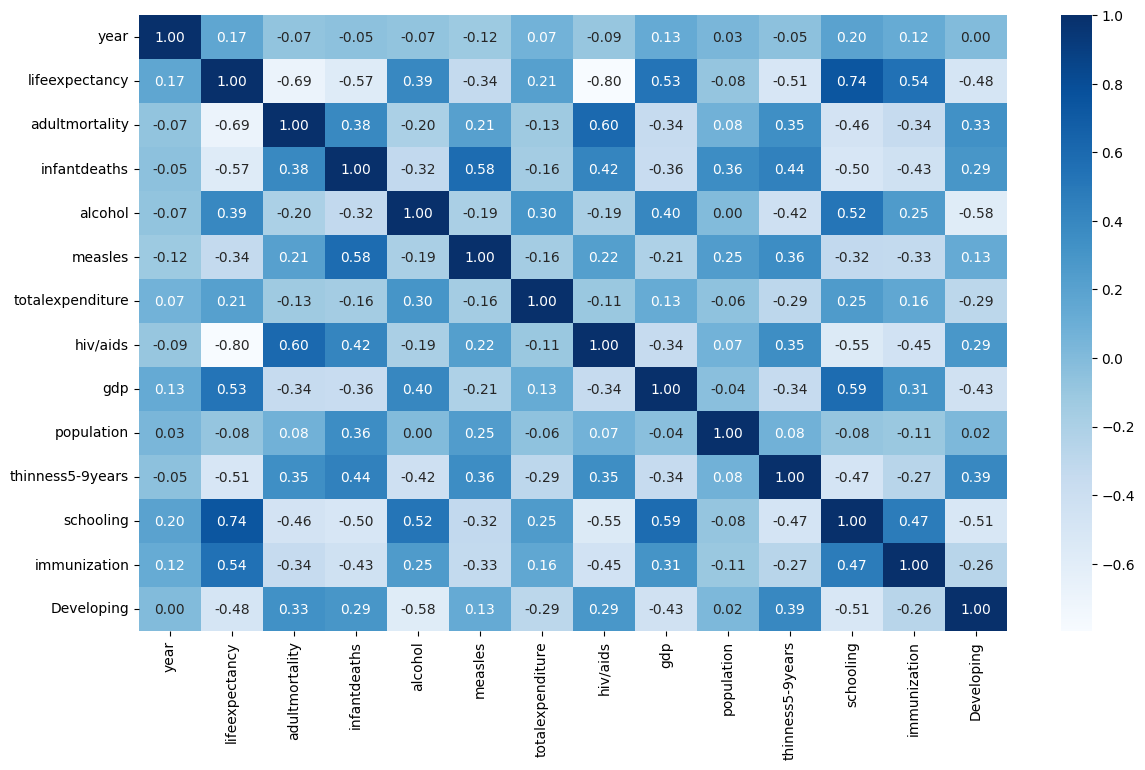

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_select.select_dtypes(exclude=np.object_).corr(),annot=True, cmap="Blues", fmt='.2f')

plt.show()

### Model Building (Round 2)

#### Linear Regression

In [ ]:
# Splitting the dataset into features and target.
X = df_select.drop(columns=["lifeexpectancy"])
y = df_select["lifeexpectancy"]

In [ ]:
# Splitting into Traning, Testing, and Validation sets

## Final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training and validation set
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Initialization
lm2 = LinearRegression()

In [ ]:
# Training model
lm2.fit(X_train_v, y_train_v)

LinearRegression()

In [ ]:
# Predict
y_val_pred = lm2.predict(X_val)

In [ ]:
# Validation Metrics
lm2_results = get_results("Linear Regression",y_val,y_val_pred)
lm2_results.head()

Model        R2        MSE       MAE      RMSE
0  Linear Regression  0.833398  15.292195  2.885024  3.910524

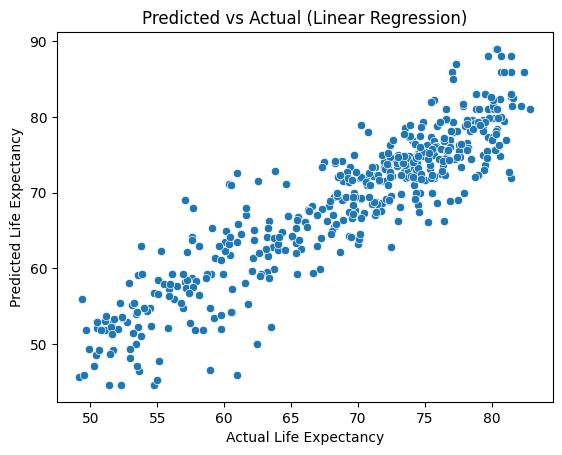

In [ ]:
# Draw plot of the regresion result line for the model
draw_results("Linear Regression",y_val,y_val_pred)

##### Normalizing Features Version

In [ ]:
# Normalizing our data

# columns to be normalize
norm_cols = X_train_v.columns[X_train_v.columns != "Developing"]

# initialize scaler
scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = MinMaxScaler()

# fit and scale training set
X_train_scaled = scaler.fit_transform(X_train_v[norm_cols])

# scale validation set
X_val_scaled = scaler.transform(X_val[norm_cols])

In [ ]:
# Scaled training dataset
X_train_scaled = pd.DataFrame(X_train_scaled,columns=norm_cols)
X_train_scaled["Developing"] = X_train_v["Developing"].reset_index(drop=True)

# Scaled testing dataset
X_val_scaled = pd.DataFrame(X_val_scaled,columns=norm_cols)
X_val_scaled["Developing"] = X_val["Developing"].reset_index(drop=True)

In [ ]:
# Training model with normalize features
lm2.fit(X_train_scaled, y_train_v)

LinearRegression()

In [ ]:
# Predicting (normalize version)
y_val_pred = lm2.predict(X_val_scaled)

In [ ]:
# Validation Metrics
lm2_norm_results = get_results("Linear Regression w/ normalization",y_val,y_val_pred)
lm2_norm_results.head()

Model        R2        MSE       MAE      RMSE
0  Linear Regression w/ normalization  0.833398  15.292195  2.885024  3.910524

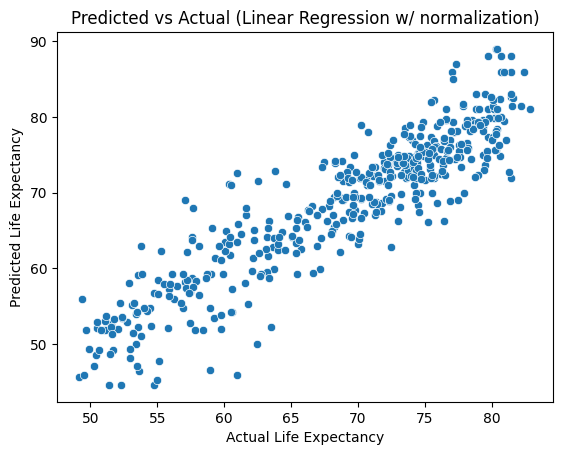

In [ ]:
# Draw results
draw_results("Linear Regression w/ normalization",y_val,y_val_pred)

In this case Normalization don't seem to add value to our model, having tried Standard, MinMax and Robust, they all yield the same results.
The model achieve a MSE of 15.3 and a R2 of 83%.


#### Decision Tree

In [ ]:
# Initialization
dt2 = DecisionTreeRegressor(random_state=42)

In [ ]:
### Gridsearch to find the best hyperparameters for the model.
cv_parameters= {
    'max_depth': [2, 6, 10, 14, 20, None],
    'min_samples_leaf': [2, 5, 8],
    'min_samples_split': [2, 6, 10],
}

dt2_grid = GridSearchCV(dt2, cv_parameters, cv=5, scoring="neg_mean_squared_error")

### Train the model
dt2_grid.fit(X_train_v, y_train_v)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [2, 6, 10, 14, 20, None],
                         'min_samples_leaf': [2, 5, 8],
                         'min_samples_split': [2, 6, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Model Validation
y_val_pred = dt2_grid.best_estimator_.predict(X_val)

In [ ]:
# Validation Metrics
dt2_results = get_results("Decision Tree",y_val,y_val_pred)
dt2_results.head()

Model       R2       MSE       MAE      RMSE
0  Decision Tree  0.92685  6.714331  1.811868  2.591203

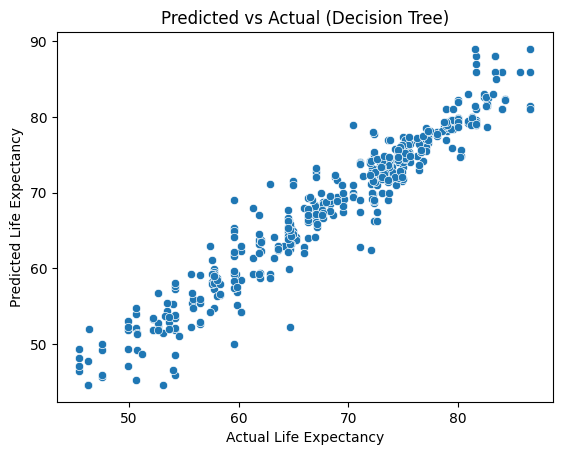

In [ ]:
# Draw plot of the regresion result of the model
draw_results("Decision Tree",y_val,y_val_pred)

The Decision Tree model performed better that the Linear Regression, yielding a result of MSE 6.71 and a R2 of 92%.

#### Random Forest

In [ ]:
# Initialization
rf2 = RandomForestRegressor(random_state=42)

In [ ]:
# Gridsearch to find the best hyperparameters
cv_parameters= {
    'max_depth': [2, 20, None],
    'min_samples_leaf': [2, 5, 8],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 300],
    'max_samples': [0.7, 1.0],
    'max_features': [1.0]
}

rf2_grid = GridSearchCV(rf2, cv_parameters, cv=5, scoring="neg_mean_squared_error")

### Train the model
rf2_grid.fit(X_train_v,y_train_v)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 20, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# Model Evaluation
y_val_pred = rf2_grid.best_estimator_.predict(X_val)

In [ ]:
# Metrics
rf2_results = get_results("Random Forest",y_val,y_val_pred)
rf2_results.head()

Model        R2       MSE       MAE      RMSE
0  Random Forest  0.956726  3.972103  1.237579  1.993014

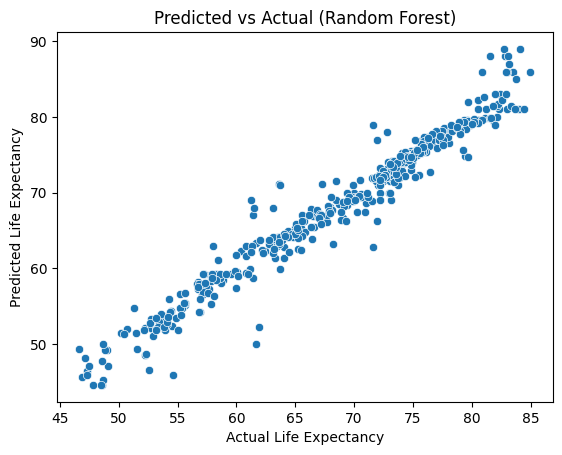

In [ ]:
#  Draw plot of the regresion result of the model
draw_results("Random Forest",y_val,y_val_pred)

The Random Forest Model performed exceptionally, with a R2 of 95% and a MSE of 3.97, only slightly lower that our previous Random Forest model before Features Engineering and Selection (R2: 0.97 and MSE: 2.13).

#### ADABoost

In [ ]:
### Initialization
ada2 = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)

In [ ]:
# Gridsearch to find the best hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],              # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5, 1],       # Step size for each boosting round
    'estimator__max_depth': [1, 3, 5, 7],       # Maximum depth of the base decision tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

ada_grid2 = GridSearchCV(ada2, param_grid, cv=5, scoring="neg_mean_squared_error")

### Train the model
ada_grid2.fit(X_train_v, y_train_v)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42),
                                         random_state=42),
             param_grid={'estimator__max_depth': [1, 3, 5, 7],
                         'estimator__min_samples_split': [2, 5, 10],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Model Evaluation
y_val_pred = ada_grid2.best_estimator_.predict(X_val)

In [ ]:
# Metrics
ada2_results = get_results("ADA Booster",y_val,y_val_pred)
ada2_results.head()

Model        R2       MSE       MAE      RMSE
0  ADA Booster  0.953385  4.278782  1.571961  2.068522

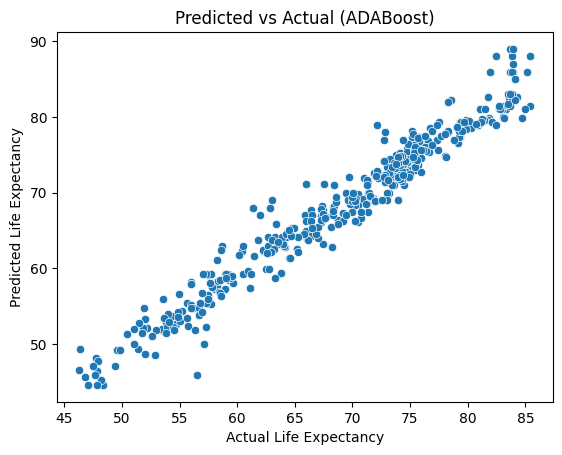

In [ ]:
#  Draw plot of the regresion result of the model
draw_results("ADABoost",y_val,y_val_pred)

### Model Selection (Round 2)

In [ ]:
### Compare all metrics to choose the best model
compare_results2 = pd.concat([lm2_results, dt2_results,rf2_results,ada2_results], ignore_index=True)
compare_results2.sort_values(by="MSE",ascending=True)

Model        R2        MSE       MAE      RMSE
2      Random Forest  0.956726   3.972103  1.237579  1.993014
3        ADA Booster  0.953385   4.278782  1.571961  2.068522
1      Decision Tree  0.926850   6.714331  1.811868  2.591203
0  Linear Regression  0.833398  15.292195  2.885024  3.910524

The results shows that Random Forest once again outperformed slightly the others models.

If we compare it to the previous models we built on the first round, before Features Engineering and Features Selection, the performance now is slighly worse but considering that we took out several features to accomplish our goal of generalizing the model, it would be considered a valid tradeoff.

### Model Evaluation (Round 2)


In [ ]:
# Use test split to evaluate the champion model
y_pred = rf2_grid.best_estimator_.predict(X_test)

In [ ]:
# Evaluation Metrics
results2 = get_results("Random Forest",y_test,y_pred)
results2.head()

Model        R2       MSE       MAE      RMSE
0  Random Forest  0.956673  3.749521  1.221671  1.936368

The performance registered is relatively great, not only we managed to generalize our model, the model will now be predicting our target based on our proposed characteristics such economic, social, immunization, etc.

#### Feature Importance

In [ ]:
# Get feature importance values
feature_importance2 = rf2_grid.best_estimator_.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance2_df = pd.DataFrame({'Features':X_train.columns,'Importance':feature_importance2})

# Sort feature by importance
feature_importance2_df = feature_importance2_df.sort_values(by='Importance',ascending=False)

feature_importance2_df

Features  Importance
6           hiv/aids    0.594320
1     adultmortality    0.190079
10         schooling    0.092257
2       infantdeaths    0.035074
9   thinness5-9years    0.028150
0               year    0.013627
3            alcohol    0.010988
5   totalexpenditure    0.006864
12        Developing    0.006854
4            measles    0.006253
11      immunization    0.005858
7                gdp    0.005829
8         population    0.003848

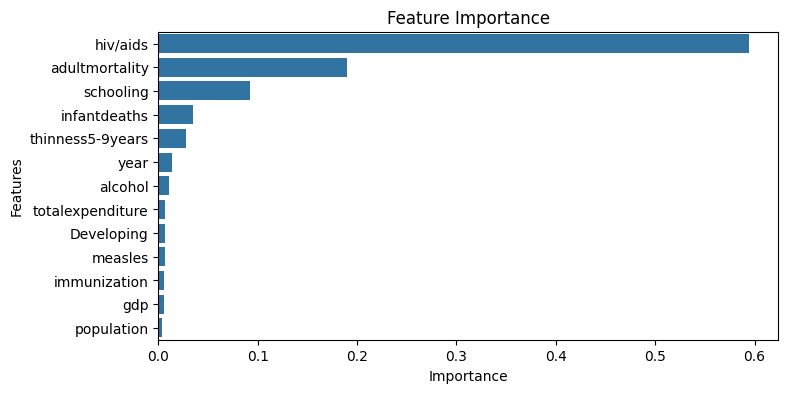

In [ ]:
# Plot Importance
plt.figure(figsize=(8,4))
sns.barplot(x='Importance',y='Features',data=feature_importance2_df)
plt.title('Feature Importance')
plt.show()

#### Hypothesis

Our new model shows that the features with the most effect on life expectancy have changed quite a bit in compared to our previous model.

On the top of the list we have `HIVS/AID` by a great margin, this suggest that countries with a **high volume of deaths related this condition may have an effect on their `life expectancy`**. This also concide with some of the followed features `adult mortality` and `infant deaths`, as conceptually they are opposite to each other.

Based on the insight it suggest that `schooling` and `thinness` seem to play a major part in the `life expectancy`. Suggesting that countries should focus on tackling **hunger and education** issues to improve life expectancy.

Interestingly, `immunization`,`gdp` and `population` don't seem to be features that had much effect on `life expectancy`.

Another insight worth mentioning is that `total expenditure` and `developing` didn't play as much as we initially though it would. This suggest that the amount of budget used on healthcare is not necessarily directly contributing to improving `life expectancy`, arguing in favor of **is not the amount of money, its the way its used**.

## Execute

In this last phase we will summarize how the model performed after the analysis and tweak we were able to construct and review based on the initial task.

### Summary of Model Performance

The performance of our random forest model on the testing data achieved an **R2 score of 97%** which is pretty much the same score we got with the training data. The model also achieved a **MSE of 2.23** and a **RMSE of 1.49**, before we proceeded with feature selection and feature engineering.

After conducting feature engineering the random forest model achieved a **R2 score of 95%, MSE of 3.75, and a RMSE of 1.93** on the testing data.

The random forest model outperformed the decision tree model slightly, although the ADABoost built based on Decision Tree was pretty close in performance, and the linear regression model (greatly).

Based on the model, `HIV/AIDS`, `adultmortality`, `schooling`, `infantdeaths`, and `thinness5-9years` were the most influential features in determining the life expectancy of a country.

### Conclusion and Recommendation

This project aimed to predict life expectancy using various socio-economic and health-related factors. Initial modeling with a Random Forest regressor achieved excellent performance (R² ≈ 0.97, MSE ≈ 2.13), but relied heavily on country-specific information, hindering generalization.

Subsequent feature engineering and selection, including combining immunization metrics and removing multicollinear features, created a more generalized model. While the R² slightly decreased (to ≈ 0.95) and MSE increased (to ≈ 3.75), this new model provides more actionable insights by focusing on factors like **HIV/AIDS** prevalence, **adult mortality**, **schooling**, **infant mortality**, and **childhood malnutrition**.

Importantly, the model demonstrated that simply increasing healthcare expenditure might not directly translate to higher life expectancy, highlighting the need for efficient resource allocation.

Based on the model's findings, several key areas warrant focus for improving global life expectancy:

* **Combatting HIV/AIDS:**  The model identifies HIV/AIDS as the most significant factor impacting life expectancy.  Increased investment in prevention, treatment, and awareness programs is crucial.List
* **Improving Education and Nutrition:**  The significant influence of schooling and malnutrition indicators suggests that addressing these issues seems to be key factors. Investments in education infrastructure, teacher training, and accessible nutritional programs can yield substantial improvements in life expectancy.
* **Reducing Infant and Adult Mortality:**  High rates of infant and adult mortality negatively correlate with life expectancy. Focus should be placed on maternal and child healthcare, as well as addressing underlying causes of adult mortality.
* **Efficient Healthcare Resource Allocation:**  The model suggests that simply increasing healthcare spending is not a guarantee of improved life expectancy. Governments and organizations should prioritize strategic resource allocation, targeting specific areas based on the identified factors influencing life expectancy. Further research on the effective use of healthcare spending can inform policy decisions.



### Key Questions

Based on the analysis we can answer the initial questions we proposed:

* Does various predicting factors which has been chosen initially really affect the Life expectancy?
  * Yes, various predicting factors significantly affect life expectancy.  The initial model demonstrated a strong correlation, but the refined model identifies specific factors like HIV/AIDS, adult mortality, schooling, infant mortality, and malnutrition as particularly impactful.

* What are the predicting variables actually affecting the life expectancy?
  * The most impactful variables, according to the refined model, are: HIV/AIDS prevalence, adult mortality rate, years of schooling, infant deaths, and prevalence of thinness among children aged 5-9 years.  Other factors like immunization coverage and GDP showed less impact in this refined model compared to the initial model.

* Should a country having a lower life expectancy value (<65) increase its healthcare expenditure in order to improve its average lifespan?
  * Simply increasing healthcare expenditure is not a guarantee of improved life expectancy. The model suggests that efficient resource allocation, targeted at addressing the root causes like HIV/AIDS, malnutrition, and lack of education is more critical than the total expenditure.

* How does Infant and Adult mortality rates affect life expectancy?
  * Higher infant and adult mortality rates negatively correlate with life expectancy. Reducing these rates is vital for improving overall lifespan.

* Does Life Expectancy have positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.?
  * The provided dataset doesn't directly address all these factors. However, the significant **influence of malnutrition** (thinness 5-9 years) strongly suggests that poor eating habits and lifestyle factors negatively affect life expectancy.

* What is the impact of schooling on the lifespan of humans?
  * Higher years of schooling correlate positively with increased life expectancy. Education plays a crucial role in health awareness, access to resources, and improved living conditions.


* Does Life Expectancy have positive or negative relationship with drinking alcohol?
  * **Alcohol consumption** surprinsingly showed a positive correlation with life expectancy, further analysis would be required to isolate the individual effects but the initial hyphotesis of why this happened is because the countries that consumed the most alcohol are the developed countries, which in turn have several other factors (economic, education, others) in their favor that contribute to a also higher life expectancy, creating an unintentional bias on our alcohol consumption analysis.

* Do densely populated countries tend to have lower life expectancy?
  * If you look only at the extremly populated countries this may be true, as if falls below the median of 72 years, but after treating the outliers we can actually see that population density seems to play a minimal role when it comes to effect on lfe expectancy.

* What is the impact of Immunization coverage on Life Expectancy?
  * In the refined model, immunization coverage (represented by the combined 'immunization' feature) has a less direct impact on life expectancy that we expected compared to other factors. This differs from the initial model.

### Limitations

Based on the available data and limitation in resources there were probably some limitations that we did not explicitly address in the analysis:

*   **Lack of indutry or field knowledge:**
While we did take upon the analysis of the questions, we are not experts on the subjet matter, which may have in occasions led us to assume certain factors.
*   **Outlier handling:**
While outliers may have been addressed in some features, specific details are lacking. Robust outlier detection and handling strategies should be explored.
*   **External Factors and Confounders:**
Unmeasured variables:  Many unmeasured variables could influence life expectancy (e.g., environmental factors, political stability, healthcare system quality, cultural factors). These factors could be confounding variables.
*   **Models chosen over others:** Explain why only Linear Regression, Decision Tree, Random Forest, and AdaBoost were used. Other models could provide valuable insights.
*   **Random Forest models issue with extrapolation**: These models aren't particulary great at predicting values outside of our training data, which is a huge problem if you want to predict let say life expectancy 10 years from now, the model will only be able to give you values within the maximun range it was trained for. Other methods could be tried to look for accuracy and also extapolation capability (e.g., Neural Networks).





### Future Works

Further research should involve exploring additional features, potentially including access to clean water, sanitation, and environmental factors.  Investigating alternative model architectures and advanced feature engineering techniques could lead to even more accurate predictions and better insights.